<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [12]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-05 12:04:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-09-05 12:04:31 (5.93 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with pandas

In [13]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [15]:
# How many samples do we have?
len(df)

2787

In [16]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [17]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


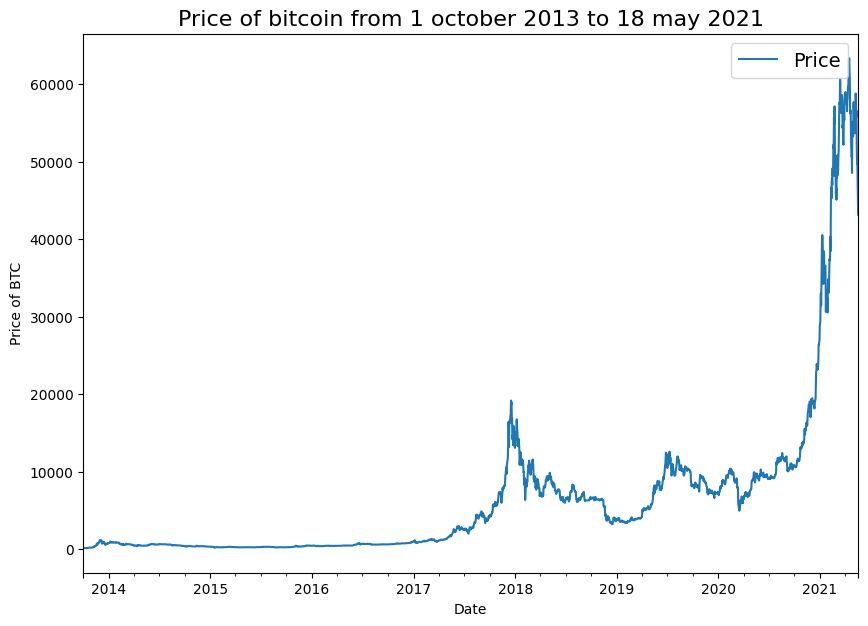

In [18]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [19]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

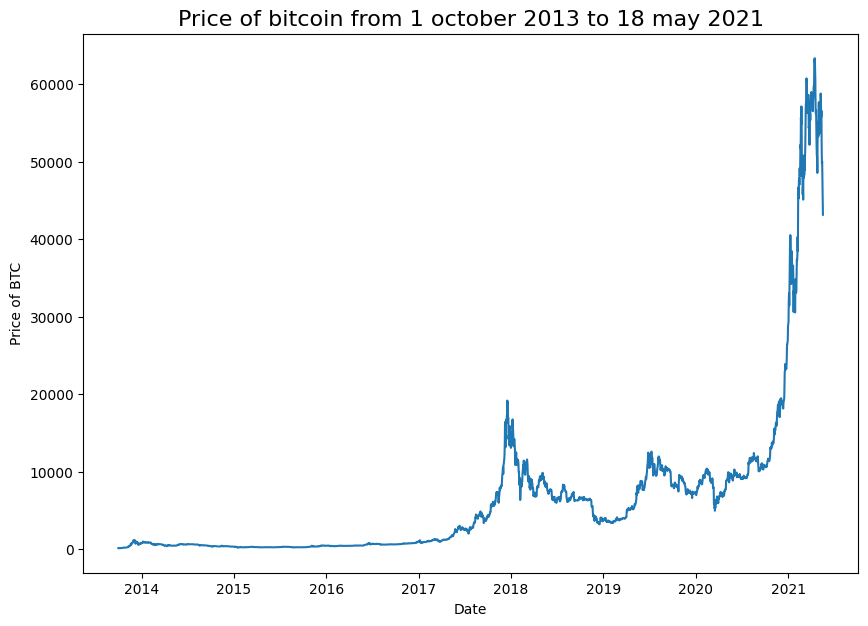

In [20]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [21]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [22]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

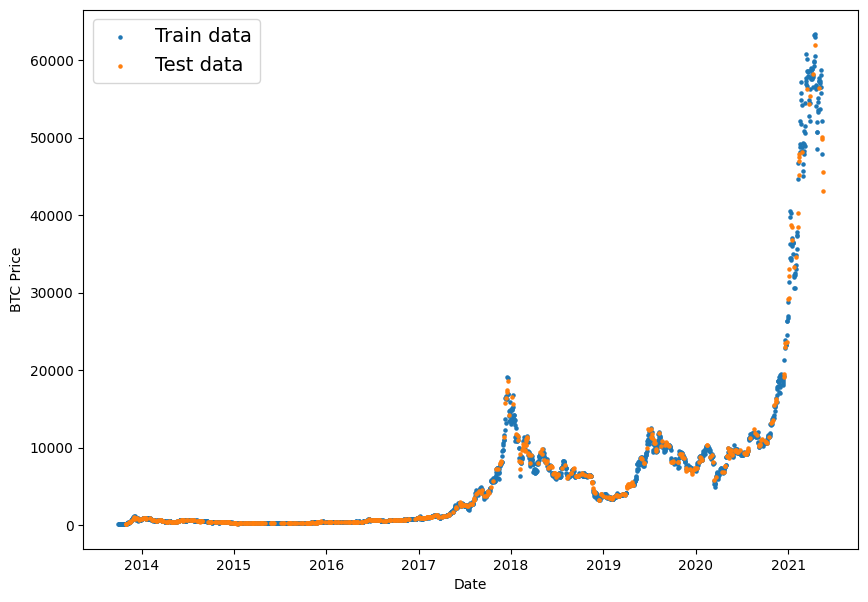

In [23]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [24]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

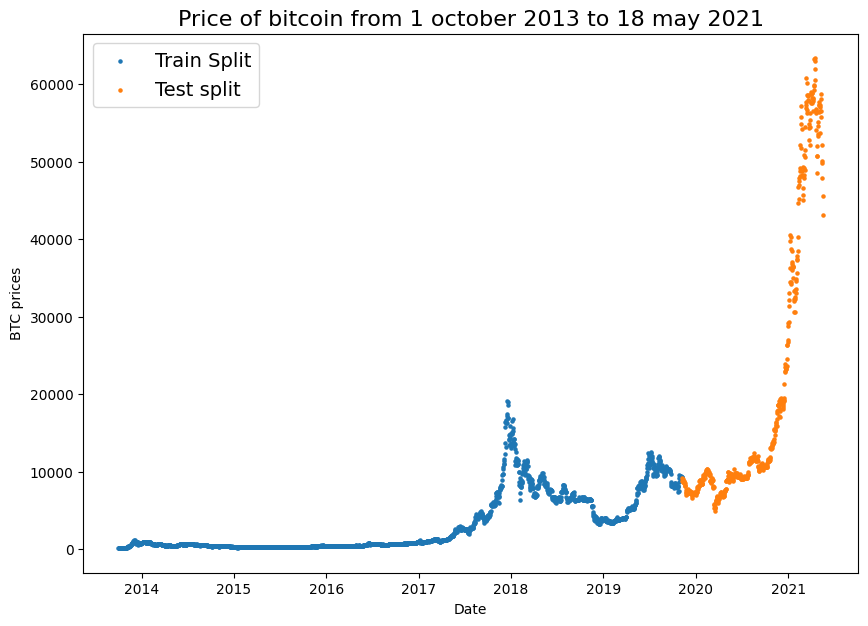

In [25]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [26]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


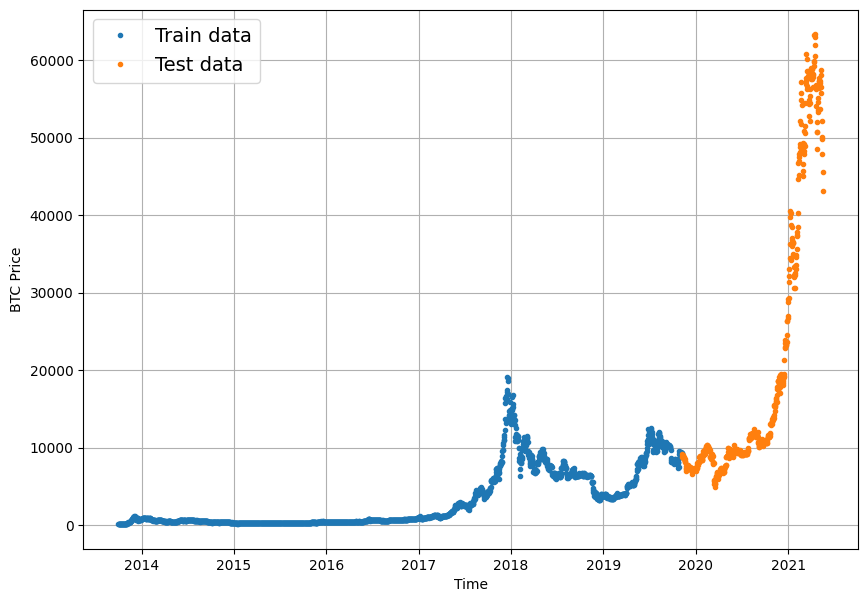

In [27]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [28]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [29]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

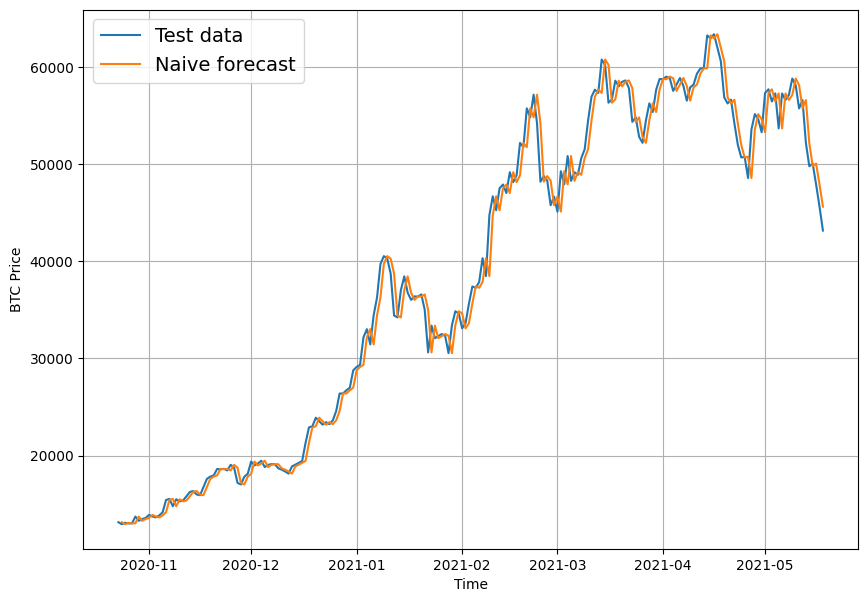

In [30]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [31]:
import tensorflow as tf

In [32]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [33]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [34]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [35]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [36]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [37]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [38]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [39]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [40]:
import numpy as np

In [41]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [42]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [43]:
len(prices)

2787

In [44]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [45]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [46]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [47]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [48]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [49]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 3644.8604 - mae: 3644.8604 

18/18 [==============================] - 5s 210ms/step - loss: 3079.9219 - mae: 3079.9219 - val_loss: 8062.8706 - val_mae: 8062.8706
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 518.6223 - mae: 518.6223

18/18 [==============================] - 2s 100ms/step - loss: 503.5736 - mae: 503.5736 - val_loss: 1941.9015 - val_mae: 1941.9015
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 224.4106 - mae: 224.4106

18/18 [==============================] - 1s 61ms/step - loss: 219.3445 - mae: 219.3445 - val_loss: 977.2790 - val_mae: 977.2790
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 180.1856 - mae: 180.1856

18/18 [==============================] - 2s 134ms/step - loss: 180.1856 - mae: 180.1856 - val_loss: 920.9340 - val_mae: 920.9340
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 173.2137 - mae: 173.2137

18/18 [==============================] - 1s 62ms/step - loss: 166.7781 - mae: 166.7781 - val_loss: 905.2184 - val_mae: 905.2184
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 166.2663 - mae: 166.2663 - val_loss: 923.0052 - val_mae: 923.0052
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 166.3821 - mae: 166.3821

18/18 [==============================] - 1s 69ms/step - loss: 162.6935 - mae: 162.6935 - val_loss: 899.5595 - val_mae: 899.5595
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4510 - mae: 137.4510

18/18 [==============================] - 2s 103ms/step - loss: 159.0278 - mae: 159.0278 - val_loss: 882.2945 - val_mae: 882.2945
Epoch 9/100
18/18 [==============================] - 0s 17ms/step - loss: 158.4898 - mae: 158.4898 - val_loss: 912.0685 - val_mae: 912.0685
Epoch 10/100
18/18 [==============================] - 0s 14ms/step - loss: 157.2849 - mae: 157.2849 - val_loss: 883.6953 - val_mae: 883.6953
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 156.5807 - mae: 156.5807

18/18 [==============================] - 1s 75ms/step - loss: 155.5960 - mae: 155.5960 - val_loss: 845.9386 - val_mae: 845.9386
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: 155.7603 - mae: 155.7603 - val_loss: 909.8731 - val_mae: 909.8731
Epoch 13/100
18/18 [==============================] - 0s 14ms/step - loss: 152.2575 - mae: 152.2575 - val_loss: 850.9674 - val_mae: 850.9674
Epoch 14/100
10/18 [===============>..............] - ETA: 0s - loss: 145.0585 - mae: 145.0585

18/18 [==============================] - 3s 152ms/step - loss: 150.1315 - mae: 150.1315 - val_loss: 831.7402 - val_mae: 831.7402
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 148.1725 - mae: 148.1725 - val_loss: 836.0870 - val_mae: 836.0870
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 148.0520 - mae: 148.0520

18/18 [==============================] - 1s 82ms/step - loss: 146.3608 - mae: 146.3608 - val_loss: 814.6240 - val_mae: 814.6240
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 143.8092 - mae: 143.8092

18/18 [==============================] - 2s 90ms/step - loss: 146.2478 - mae: 146.2478 - val_loss: 807.4366 - val_mae: 807.4366
Epoch 18/100
 9/18 [==============>...............] - ETA: 0s - loss: 152.0339 - mae: 152.0339

18/18 [==============================] - 1s 83ms/step - loss: 143.1202 - mae: 143.1202 - val_loss: 782.2056 - val_mae: 782.2056
Epoch 19/100
18/18 [==============================] - 0s 13ms/step - loss: 143.1078 - mae: 143.1078 - val_loss: 787.1782 - val_mae: 787.1782
Epoch 20/100
18/18 [==============================] - 0s 8ms/step - loss: 142.0047 - mae: 142.0047 - val_loss: 796.9120 - val_mae: 796.9120
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 205.4311 - mae: 205.4311

18/18 [==============================] - 1s 75ms/step - loss: 142.4186 - mae: 142.4186 - val_loss: 758.3314 - val_mae: 758.3314
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 152.1282 - mae: 152.1282

18/18 [==============================] - 1s 56ms/step - loss: 140.1801 - mae: 140.1801 - val_loss: 751.3026 - val_mae: 751.3026
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 144.6560 - mae: 144.6560

18/18 [==============================] - 1s 37ms/step - loss: 136.7934 - mae: 136.7934 - val_loss: 746.0146 - val_mae: 746.0146
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 135.7303 - mae: 135.7303 - val_loss: 750.3146 - val_mae: 750.3146
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 148.4851 - mae: 148.4851

18/18 [==============================] - 1s 35ms/step - loss: 134.9748 - mae: 134.9748 - val_loss: 732.4529 - val_mae: 732.4529
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 135.7197 - mae: 135.7197 - val_loss: 733.4352 - val_mae: 733.4352
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 199.5431 - mae: 199.5431

18/18 [==============================] - 1s 35ms/step - loss: 135.8170 - mae: 135.8170 - val_loss: 720.7150 - val_mae: 720.7150
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2198 - mae: 127.2198

18/18 [==============================] - 1s 45ms/step - loss: 131.1972 - mae: 131.1972 - val_loss: 711.3956 - val_mae: 711.3956
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 127.2787 - mae: 127.2787

18/18 [==============================] - 1s 77ms/step - loss: 131.9448 - mae: 131.9448 - val_loss: 705.4241 - val_mae: 705.4241
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 132.7246 - mae: 132.7246 - val_loss: 826.4371 - val_mae: 826.4371
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 140.7116 - mae: 140.7116 - val_loss: 762.5862 - val_mae: 762.5862
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 126.8234 - mae: 126.8234

18/18 [==============================] - 1s 46ms/step - loss: 133.7629 - mae: 133.7629 - val_loss: 693.8346 - val_mae: 693.8346
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 153.6122 - mae: 153.6122

18/18 [==============================] - 1s 36ms/step - loss: 131.8855 - mae: 131.8855 - val_loss: 687.6389 - val_mae: 687.6389
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 123.2090 - mae: 123.2090

18/18 [==============================] - 1s 37ms/step - loss: 128.0756 - mae: 128.0756 - val_loss: 684.6386 - val_mae: 684.6386
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0698 - mae: 127.0698 - val_loss: 689.9009 - val_mae: 689.9009
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 132.6097 - mae: 132.6097 - val_loss: 734.5295 - val_mae: 734.5295
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 128.5717 - mae: 128.5717 - val_loss: 697.7565 - val_mae: 697.7565
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 112.2106 - mae: 112.2106

18/18 [==============================] - 1s 38ms/step - loss: 126.0564 - mae: 126.0564 - val_loss: 672.1759 - val_mae: 672.1759
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 129.0939 - mae: 129.0939 - val_loss: 699.7849 - val_mae: 699.7849
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 125.5264 - mae: 125.5264

18/18 [==============================] - 1s 34ms/step - loss: 125.7882 - mae: 125.7882 - val_loss: 665.8068 - val_mae: 665.8068
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2388 - mae: 120.2388

18/18 [==============================] - 1s 36ms/step - loss: 123.6597 - mae: 123.6597 - val_loss: 659.4294 - val_mae: 659.4294
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9015 - mae: 124.9015 - val_loss: 661.1971 - val_mae: 661.1971
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3281 - mae: 108.3281

18/18 [==============================] - 1s 36ms/step - loss: 122.2186 - mae: 122.2186 - val_loss: 654.1456 - val_mae: 654.1456
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 122.3625 - mae: 122.3625 - val_loss: 661.2593 - val_mae: 661.2593
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 122.2241 - mae: 122.2241 - val_loss: 674.4727 - val_mae: 674.4727
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 97.3539 - mae: 97.3539

18/18 [==============================] - 1s 36ms/step - loss: 123.0293 - mae: 123.0293 - val_loss: 647.3989 - val_mae: 647.3989
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 120.7392 - mae: 120.7392 - val_loss: 666.3086 - val_mae: 666.3086
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6314 - mae: 121.6314 - val_loss: 690.5676 - val_mae: 690.5676
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0929 - mae: 121.0929 - val_loss: 657.3411 - val_mae: 657.3411
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 122.4745 - mae: 122.4745 - val_loss: 652.1300 - val_mae: 652.1300
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5409 - mae: 119.5409 - val_loss: 666.4861 - val_mae: 666.4861
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7691 - mae: 128.7691

18/18 [==============================] - 1s 36ms/step - loss: 120.7734 - mae: 120.7734 - val_loss: 639.5556 - val_mae: 639.5556
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 69.6675 - mae: 69.6675

18/18 [==============================] - 1s 35ms/step - loss: 122.8737 - mae: 122.8737 - val_loss: 638.1453 - val_mae: 638.1453
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 115.4012 - mae: 115.4012

18/18 [==============================] - 1s 33ms/step - loss: 118.4249 - mae: 118.4249 - val_loss: 636.0557 - val_mae: 636.0557
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 135.0502 - mae: 135.0502

18/18 [==============================] - 1s 36ms/step - loss: 120.0553 - mae: 120.0553 - val_loss: 629.4333 - val_mae: 629.4333
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 117.5857 - mae: 117.5857 - val_loss: 757.4974 - val_mae: 757.4974
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 138.7155 - mae: 138.7155 - val_loss: 633.0037 - val_mae: 633.0037
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0896 - mae: 125.0896 - val_loss: 650.9504 - val_mae: 650.9504
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 93.0574 - mae: 93.0574

18/18 [==============================] - 1s 34ms/step - loss: 116.3141 - mae: 116.3141 - val_loss: 625.9876 - val_mae: 625.9876
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6931 - mae: 116.6931 - val_loss: 637.9299 - val_mae: 637.9299
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 140.1151 - mae: 140.1151

18/18 [==============================] - 1s 36ms/step - loss: 114.7805 - mae: 114.7805 - val_loss: 617.9215 - val_mae: 617.9215
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4232 - mae: 114.4232 - val_loss: 683.0510 - val_mae: 683.0510
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 114.7973 - mae: 114.7973

18/18 [==============================] - 1s 44ms/step - loss: 119.5612 - mae: 119.5612 - val_loss: 611.6107 - val_mae: 611.6107
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2873 - mae: 114.2873 - val_loss: 646.4904 - val_mae: 646.4904
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9909 - mae: 137.9909

18/18 [==============================] - 1s 76ms/step - loss: 115.6582 - mae: 115.6582 - val_loss: 609.4683 - val_mae: 609.4683
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 124.3549 - mae: 124.3549

18/18 [==============================] - 1s 49ms/step - loss: 113.2973 - mae: 113.2973 - val_loss: 608.0438 - val_mae: 608.0438
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4873 - mae: 113.4873 - val_loss: 675.3870 - val_mae: 675.3870
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2482 - mae: 117.2482 - val_loss: 711.5695 - val_mae: 711.5695
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 131.5521 - mae: 131.5521 - val_loss: 682.0247 - val_mae: 682.0247
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0267 - mae: 138.0267

18/18 [==============================] - 1s 35ms/step - loss: 121.7809 - mae: 121.7809 - val_loss: 603.0461 - val_mae: 603.0461
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 116.2664 - mae: 116.2664 - val_loss: 641.1935 - val_mae: 641.1935
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3625 - mae: 115.3625 - val_loss: 609.9560 - val_mae: 609.9560
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9669 - mae: 113.9669 - val_loss: 612.3855 - val_mae: 612.3855
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1644 - mae: 113.1644 - val_loss: 612.0386 - val_mae: 612.0386
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7067 - mae: 128.7067

18/18 [==============================] - 1s 35ms/step - loss: 112.8718 - mae: 112.8718 - val_loss: 600.6537 - val_mae: 600.6537
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 81.9220 - mae: 81.9220

18/18 [==============================] - 1s 34ms/step - loss: 112.2462 - mae: 112.2462 - val_loss: 599.2662 - val_mae: 599.2662
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 89.0826 - mae: 89.0826

18/18 [==============================] - 1s 34ms/step - loss: 112.5770 - mae: 112.5770 - val_loss: 594.9415 - val_mae: 594.9415
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6288 - mae: 111.6288 - val_loss: 601.4890 - val_mae: 601.4890
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4023 - mae: 111.4023 - val_loss: 613.6922 - val_mae: 613.6922
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0342 - mae: 119.0342

18/18 [==============================] - 1s 35ms/step - loss: 113.5182 - mae: 113.5182 - val_loss: 594.2736 - val_mae: 594.2736
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9831 - mae: 109.9831 - val_loss: 603.6992 - val_mae: 603.6992
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1431 - mae: 115.1431 - val_loss: 605.9592 - val_mae: 605.9592
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2852 - mae: 116.2852 - val_loss: 615.4077 - val_mae: 615.4077
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 117.0939 - mae: 117.0939

18/18 [==============================] - 1s 36ms/step - loss: 114.9330 - mae: 114.9330 - val_loss: 589.3885 - val_mae: 589.3885
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 78.1845 - mae: 78.1845

18/18 [==============================] - 1s 35ms/step - loss: 111.5825 - mae: 111.5825 - val_loss: 588.7198 - val_mae: 588.7198
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4836 - mae: 110.4836 - val_loss: 605.3869 - val_mae: 605.3869
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8729 - mae: 125.8729

18/18 [==============================] - 1s 34ms/step - loss: 109.8003 - mae: 109.8003 - val_loss: 588.2994 - val_mae: 588.2994
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2050 - mae: 109.2050 - val_loss: 614.1331 - val_mae: 614.1331
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 109.6694 - mae: 109.6694

18/18 [==============================] - 1s 35ms/step - loss: 110.3780 - mae: 110.3780 - val_loss: 586.7491 - val_mae: 586.7491
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6678 - mae: 108.6678 - val_loss: 654.5513 - val_mae: 654.5513
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1677 - mae: 112.1677 - val_loss: 616.5458 - val_mae: 616.5458
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 100.4879 - mae: 100.4879

18/18 [==============================] - 1s 34ms/step - loss: 111.2675 - mae: 111.2675 - val_loss: 584.3983 - val_mae: 584.3983
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6906 - mae: 116.6906 - val_loss: 629.2243 - val_mae: 629.2243
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 146.3768 - mae: 146.3768

18/18 [==============================] - 1s 34ms/step - loss: 110.5812 - mae: 110.5812 - val_loss: 580.6975 - val_mae: 580.6975
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 137.8333 - mae: 137.8333

18/18 [==============================] - 1s 35ms/step - loss: 108.1440 - mae: 108.1440 - val_loss: 580.2649 - val_mae: 580.2649
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2269 - mae: 111.2269 - val_loss: 613.1637 - val_mae: 613.1637
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 107.5103 - mae: 107.5103

18/18 [==============================] - 1s 36ms/step - loss: 110.6076 - mae: 110.6076 - val_loss: 578.2557 - val_mae: 578.2557
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7632 - mae: 108.7632 - val_loss: 578.9888 - val_mae: 578.9888
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 150.1959 - mae: 150.1959

18/18 [==============================] - 1s 65ms/step - loss: 108.7248 - mae: 108.7248 - val_loss: 577.6758 - val_mae: 577.6758
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5795 - mae: 115.5795 - val_loss: 688.8906 - val_mae: 688.8906


In [50]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 688.8906 - mae: 688.8906


[688.890625, 688.890625]

In [51]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.6758 - mae: 577.6758


[577.6758422851562, 577.6758422851562]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [52]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 3ms/step


array([[ 8858.736 ],
       [ 8777.526 ],
       [ 9027.178 ],
       [ 8738.971 ],
       [ 8733.516 ],
       [ 8798.72  ],
       [ 8625.907 ],
       [ 8527.463 ],
       [ 8471.719 ],
       [ 8514.826 ],
       [ 8249.402 ],
       [ 8114.8354],
       [ 8094.25  ],
       [ 7653.9604],
       [ 7293.2456],
       [ 7288.1377],
       [ 7043.5   ],
       [ 7131.6123],
       [ 7176.2373],
       [ 7423.4326],
       [ 7452.996 ],
       [ 7649.729 ],
       [ 7635.103 ],
       [ 7376.7754],
       [ 7372.39  ],
       [ 7296.433 ],
       [ 7209.053 ],
       [ 7359.358 ],
       [ 7502.4116],
       [ 7518.5376],
       [ 7567.4707],
       [ 7383.974 ],
       [ 7243.934 ],
       [ 7204.952 ],
       [ 7165.2554],
       [ 7220.5894],
       [ 7114.0723],
       [ 7100.1743],
       [ 6933.318 ],
       [ 6606.7344],
       [ 7270.3296],
       [ 7215.5693],
       [ 7077.9014],
       [ 7367.57  ],
       [ 7218.0527],
       [ 7162.386 ],
       [ 7241.198 ],
       [ 7214

In [53]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 577.6758,
 'mse': 1188864.5,
 'rmse': 1090.3506,
 'mape': 2.565512,
 'mase': 1.0148164}

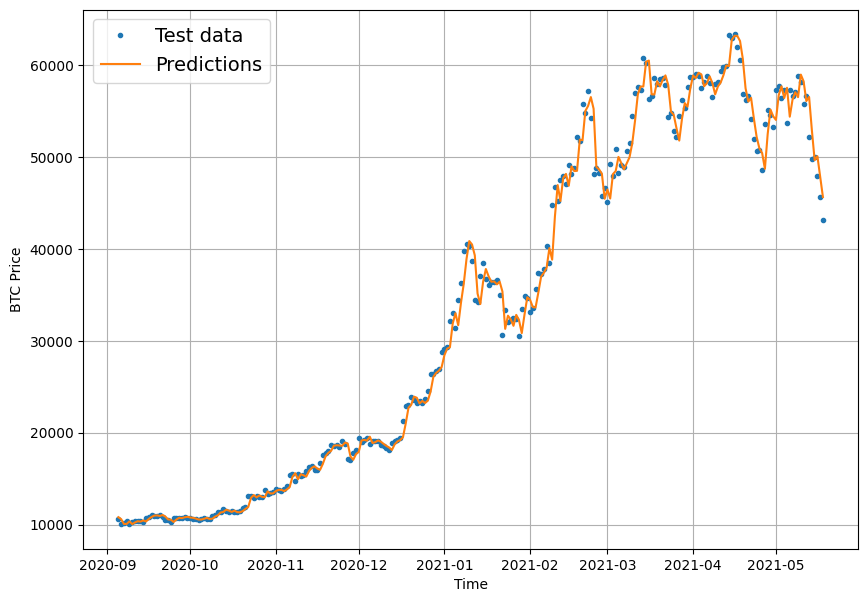

In [54]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [55]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [56]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [57]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 3555.7874 - mae: 3555.7874 

18/18 [==============================] - 3s 97ms/step - loss: 2890.9482 - mae: 2890.9482 - val_loss: 4705.3921 - val_mae: 4705.3921
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1273.3311 - mae: 1273.3311

18/18 [==============================] - 1s 74ms/step - loss: 685.8522 - mae: 685.8522 - val_loss: 2430.2065 - val_mae: 2430.2065
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 451.7291 - mae: 451.7291

18/18 [==============================] - 2s 93ms/step - loss: 429.3222 - mae: 429.3222 - val_loss: 2191.6514 - val_mae: 2191.6514
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 318.0100 - mae: 318.0100

18/18 [==============================] - 2s 144ms/step - loss: 314.3226 - mae: 314.3226 - val_loss: 1483.1613 - val_mae: 1483.1613
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 264.6966 - mae: 264.6966

18/18 [==============================] - 1s 87ms/step - loss: 259.8474 - mae: 259.8474 - val_loss: 1279.7716 - val_mae: 1279.7716
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 238.9831 - mae: 238.9831 - val_loss: 1440.7000 - val_mae: 1440.7000
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 211.6175 - mae: 211.6175

18/18 [==============================] - 1s 75ms/step - loss: 207.8619 - mae: 207.8619 - val_loss: 1140.4711 - val_mae: 1140.4711
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 197.1970 - mae: 197.1970

18/18 [==============================] - 2s 101ms/step - loss: 198.0893 - mae: 198.0893 - val_loss: 1126.3898 - val_mae: 1126.3898
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 206.7307 - mae: 206.7307

18/18 [==============================] - 1s 68ms/step - loss: 190.6069 - mae: 190.6069 - val_loss: 1117.7068 - val_mae: 1117.7068
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 185.8793 - mae: 185.8793 - val_loss: 1201.7871 - val_mae: 1201.7871
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 183.2433 - mae: 183.2433

18/18 [==============================] - 1s 81ms/step - loss: 182.2814 - mae: 182.2814 - val_loss: 1055.2561 - val_mae: 1055.2561
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 174.6671 - mae: 174.6671

18/18 [==============================] - 1s 86ms/step - loss: 174.5149 - mae: 174.5149 - val_loss: 984.6901 - val_mae: 984.6901
Epoch 13/100
18/18 [==============================] - 0s 16ms/step - loss: 169.5556 - mae: 169.5556 - val_loss: 1001.7329 - val_mae: 1001.7329
Epoch 14/100
18/18 [==============================] - 0s 14ms/step - loss: 170.8140 - mae: 170.8140 - val_loss: 1059.2346 - val_mae: 1059.2346
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 177.0219 - mae: 177.0219 - val_loss: 1030.5980 - val_mae: 1030.5980
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 181.2124 - mae: 181.2124

18/18 [==============================] - 2s 121ms/step - loss: 193.4678 - mae: 193.4678 - val_loss: 948.1343 - val_mae: 948.1343
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 160.5470 - mae: 160.5470 - val_loss: 1366.4833 - val_mae: 1366.4833
Epoch 18/100
18/18 [==============================] - 0s 17ms/step - loss: 179.3469 - mae: 179.3469 - val_loss: 1089.5524 - val_mae: 1089.5524
Epoch 19/100
18/18 [==============================] - 0s 16ms/step - loss: 164.7091 - mae: 164.7091 - val_loss: 1065.6101 - val_mae: 1065.6101
Epoch 20/100
18/18 [==============================] - 0s 12ms/step - loss: 163.5768 - mae: 163.5768 - val_loss: 1016.2014 - val_mae: 1016.2014
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 186.2007 - mae: 186.2007

18/18 [==============================] - 3s 148ms/step - loss: 180.1299 - mae: 180.1299 - val_loss: 862.0082 - val_mae: 862.0082
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 154.9991 - mae: 154.9991 - val_loss: 902.9648 - val_mae: 902.9648
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 153.0186 - mae: 153.0186 - val_loss: 1156.3138 - val_mae: 1156.3138
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 153.0231 - mae: 153.0231 - val_loss: 877.5747 - val_mae: 877.5747
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 146.1299 - mae: 146.1299 - val_loss: 991.3906 - val_mae: 991.3906
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 164.7236 - mae: 164.7236 - val_loss: 1189.1259 - val_mae: 1189.1259
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 148.0962 - mae: 148.0962 - val_loss: 867.0693 - val_mae: 867.0693
Epoch 28/100
18/18 [======

18/18 [==============================] - 1s 81ms/step - loss: 161.5867 - mae: 161.5867 - val_loss: 807.1469 - val_mae: 807.1469
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 154.3902 - mae: 154.3902 - val_loss: 1030.1788 - val_mae: 1030.1788
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 155.8756 - mae: 155.8756

18/18 [==============================] - 1s 72ms/step - loss: 151.4240 - mae: 151.4240 - val_loss: 764.0671 - val_mae: 764.0671
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 145.2477 - mae: 145.2477 - val_loss: 996.8480 - val_mae: 996.8480
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 148.8630 - mae: 148.8630 - val_loss: 806.7030 - val_mae: 806.7030
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 159.0446 - mae: 159.0446

18/18 [==============================] - 1s 71ms/step - loss: 159.0446 - mae: 159.0446 - val_loss: 751.4290 - val_mae: 751.4290
Epoch 35/100
13/18 [====================>.........] - ETA: 0s - loss: 160.9120 - mae: 160.9120

18/18 [==============================] - 1s 71ms/step - loss: 156.4203 - mae: 156.4203 - val_loss: 744.9095 - val_mae: 744.9095
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 140.2581 - mae: 140.2581 - val_loss: 873.2167 - val_mae: 873.2167
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 137.7342 - mae: 137.7342 - val_loss: 791.9314 - val_mae: 791.9314
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 154.0035 - mae: 154.0035 - val_loss: 812.2841 - val_mae: 812.2841
Epoch 39/100
18/18 [==============================] - 0s 11ms/step - loss: 150.5197 - mae: 150.5197 - val_loss: 1121.1470 - val_mae: 1121.1470
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 181.3564 - mae: 181.3564

18/18 [==============================] - 1s 74ms/step - loss: 186.5775 - mae: 186.5775 - val_loss: 734.3988 - val_mae: 734.3988
Epoch 41/100
18/18 [==============================] - 0s 9ms/step - loss: 170.2446 - mae: 170.2446 - val_loss: 758.0615 - val_mae: 758.0615
Epoch 42/100
18/18 [==============================] - 0s 16ms/step - loss: 135.2623 - mae: 135.2623 - val_loss: 740.8231 - val_mae: 740.8231
Epoch 43/100
18/18 [==============================] - 0s 16ms/step - loss: 130.3165 - mae: 130.3165 - val_loss: 770.2068 - val_mae: 770.2068
Epoch 44/100
18/18 [==============================] - 0s 23ms/step - loss: 141.6135 - mae: 141.6135 - val_loss: 745.4059 - val_mae: 745.4059
Epoch 45/100
18/18 [==============================] - 0s 21ms/step - loss: 129.1181 - mae: 129.1181 - val_loss: 762.2468 - val_mae: 762.2468
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 127.3700 - mae: 127.3700

18/18 [==============================] - 3s 151ms/step - loss: 129.6729 - mae: 129.6729 - val_loss: 713.9567 - val_mae: 713.9567
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 134.1218 - mae: 134.1218 - val_loss: 771.1587 - val_mae: 771.1587
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 129.2260 - mae: 129.2260

18/18 [==============================] - 1s 68ms/step - loss: 132.8080 - mae: 132.8080 - val_loss: 700.9050 - val_mae: 700.9050
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 131.1399 - mae: 131.1399 - val_loss: 765.5940 - val_mae: 765.5940
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 146.9960 - mae: 146.9960 - val_loss: 1040.1284 - val_mae: 1040.1284
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 147.4270 - mae: 147.4270 - val_loss: 1023.7000 - val_mae: 1023.7000
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 146.7774 - mae: 146.7774 - val_loss: 1150.2280 - val_mae: 1150.2280
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 154.2904 - mae: 154.2904 - val_loss: 732.5948 - val_mae: 732.5948
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 143.1240 - mae: 143.1240 - val_loss: 816.0786 - val_mae: 816.0786
Epoch 55/100
18/18 [======

18/18 [==============================] - 1s 62ms/step - loss: 125.6484 - mae: 125.6484 - val_loss: 674.0948 - val_mae: 674.0948
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5892 - mae: 121.5892 - val_loss: 708.0540 - val_mae: 708.0540
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3980 - mae: 139.3980

18/18 [==============================] - 1s 58ms/step - loss: 129.5427 - mae: 129.5427 - val_loss: 651.9160 - val_mae: 651.9160
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 128.9946 - mae: 128.9946 - val_loss: 666.7302 - val_mae: 666.7302
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 125.4708 - mae: 125.4708 - val_loss: 656.1020 - val_mae: 656.1020
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 121.1635 - mae: 121.1635 - val_loss: 984.4180 - val_mae: 984.4180
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 130.1179 - mae: 130.1179 - val_loss: 784.9818 - val_mae: 784.9818
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 134.0141 - mae: 134.0141 - val_loss: 801.6124 - val_mae: 801.6124
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 129.2498 - mae: 129.2498 - val_loss: 859.3759 - val_mae: 859.3759
Epoch 73/100
18/18 [============

18/18 [==============================] - 1s 51ms/step - loss: 138.3706 - mae: 138.3706 - val_loss: 645.0114 - val_mae: 645.0114
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 127.1639 - mae: 127.1639 - val_loss: 903.3412 - val_mae: 903.3412
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 141.7837 - mae: 141.7837

18/18 [==============================] - 1s 52ms/step - loss: 138.2709 - mae: 138.2709 - val_loss: 644.7305 - val_mae: 644.7305
Epoch 79/100
18/18 [==============================] - 0s 9ms/step - loss: 118.6709 - mae: 118.6709 - val_loss: 657.6361 - val_mae: 657.6361
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0497 - mae: 121.0497 - val_loss: 773.2433 - val_mae: 773.2433
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 138.1330 - mae: 138.1330 - val_loss: 826.4655 - val_mae: 826.4655
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 135.6645 - mae: 135.6645 - val_loss: 905.1172 - val_mae: 905.1172
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 131.6310 - mae: 131.6310 - val_loss: 726.2819 - val_mae: 726.2819
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 129.0789 - mae: 129.0789

18/18 [==============================] - 3s 154ms/step - loss: 120.8675 - mae: 120.8675 - val_loss: 632.6781 - val_mae: 632.6781
Epoch 85/100
18/18 [==============================] - 0s 18ms/step - loss: 118.5597 - mae: 118.5597 - val_loss: 649.1038 - val_mae: 649.1038
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 128.0875 - mae: 128.0875 - val_loss: 663.7236 - val_mae: 663.7236
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 126.3138 - mae: 126.3138

18/18 [==============================] - 2s 102ms/step - loss: 118.6074 - mae: 118.6074 - val_loss: 630.1144 - val_mae: 630.1144
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7590 - mae: 116.7590 - val_loss: 645.5807 - val_mae: 645.5807
Epoch 89/100
18/18 [==============================] - 0s 13ms/step - loss: 121.0945 - mae: 121.0945 - val_loss: 1056.9530 - val_mae: 1056.9530
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 161.5974 - mae: 161.5974 - val_loss: 740.5388 - val_mae: 740.5388
Epoch 91/100
18/18 [==============================] - ETA: 0s - loss: 125.3722 - mae: 125.3722

18/18 [==============================] - 1s 80ms/step - loss: 125.3722 - mae: 125.3722 - val_loss: 627.7039 - val_mae: 627.7039
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 125.9620 - mae: 125.9620 - val_loss: 759.6547 - val_mae: 759.6547
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 167.1726 - mae: 167.1726 - val_loss: 629.1225 - val_mae: 629.1225
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 149.5099 - mae: 149.5099 - val_loss: 713.3788 - val_mae: 713.3788
Epoch 95/100
18/18 [==============================] - 0s 9ms/step - loss: 139.5228 - mae: 139.5228 - val_loss: 632.5482 - val_mae: 632.5482
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 126.6446 - mae: 126.6446 - val_loss: 755.8689 - val_mae: 755.8689
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 125.7739 - mae: 125.7739 - val_loss: 640.4662 - val_mae: 640.4662
Epoch 98/100
18/18 [============

In [58]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 627.7039 - mae: 627.7039


[627.7039184570312, 627.7039184570312]

In [59]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 3ms/step


In [60]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 627.70386,
 'mse': 1367503.5,
 'rmse': 1169.4031,
 'mape': 2.8193488,
 'mase': 1.0972323}

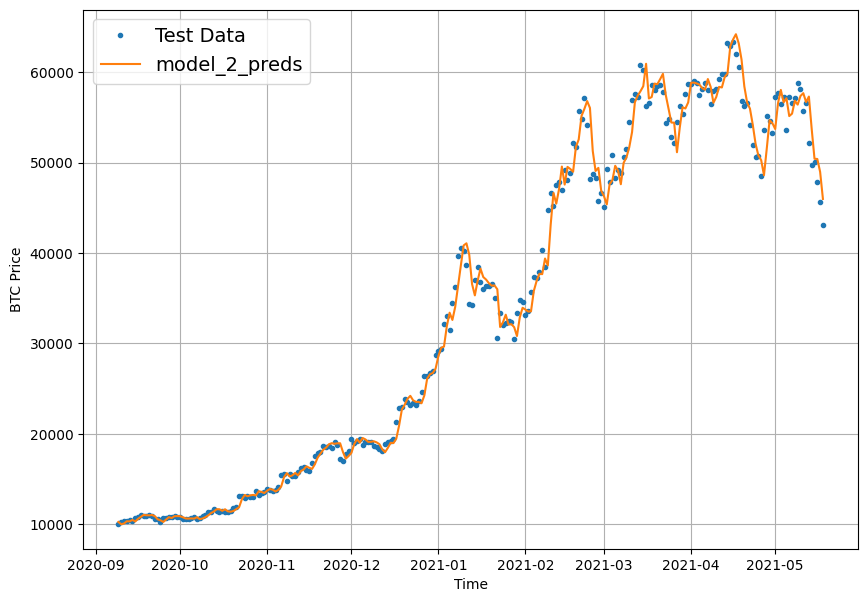

In [61]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [62]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [63]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [64]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1403.0543 - mae: 1403.0543 

18/18 [==============================] - 3s 91ms/step - loss: 1396.1022 - mae: 1396.1022 - val_loss: 3104.0830 - val_mae: 3104.0830
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 472.2704 - mae: 472.2704

18/18 [==============================] - 2s 123ms/step - loss: 469.7869 - mae: 469.7869 - val_loss: 2115.5618 - val_mae: 2115.5618
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 372.4964 - mae: 372.4964

18/18 [==============================] - 1s 78ms/step - loss: 370.5051 - mae: 370.5051 - val_loss: 1974.0009 - val_mae: 1974.0009
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 340.4890 - mae: 340.4890

18/18 [==============================] - 1s 59ms/step - loss: 341.2416 - mae: 341.2416 - val_loss: 1723.4323 - val_mae: 1723.4323
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 315.6179 - mae: 315.6179 - val_loss: 1749.2429 - val_mae: 1749.2429
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 300.1934 - mae: 300.1934

18/18 [==============================] - 1s 65ms/step - loss: 300.1934 - mae: 300.1934 - val_loss: 1581.1936 - val_mae: 1581.1936
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 286.5268 - mae: 286.5268

18/18 [==============================] - 1s 66ms/step - loss: 286.5268 - mae: 286.5268 - val_loss: 1509.6626 - val_mae: 1509.6626
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 280.2536 - mae: 280.2536

18/18 [==============================] - 1s 64ms/step - loss: 280.2807 - mae: 280.2807 - val_loss: 1478.0800 - val_mae: 1478.0800
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 275.3016 - mae: 275.3016 - val_loss: 1568.5740 - val_mae: 1568.5740
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 278.8751 - mae: 278.8751 - val_loss: 1481.3511 - val_mae: 1481.3511
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 268.9738 - mae: 268.9738

18/18 [==============================] - 1s 65ms/step - loss: 269.3117 - mae: 269.3117 - val_loss: 1411.6322 - val_mae: 1411.6322
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 260.2836 - mae: 260.2836 - val_loss: 1494.8687 - val_mae: 1494.8687
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 250.9793 - mae: 250.9793

18/18 [==============================] - 1s 63ms/step - loss: 258.6065 - mae: 258.6065 - val_loss: 1399.8069 - val_mae: 1399.8069
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 257.9876 - mae: 257.9876 - val_loss: 1400.1295 - val_mae: 1400.1295
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 257.6548 - mae: 257.6548 - val_loss: 1459.8145 - val_mae: 1459.8145
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 254.0074 - mae: 254.0074 - val_loss: 1415.6194 - val_mae: 1415.6194
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 251.8498 - mae: 251.8498 - val_loss: 1569.5330 - val_mae: 1569.5330
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 256.3351 - mae: 256.3351 - val_loss: 1427.0010 - val_mae: 1427.0010
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 246.5064 - mae: 246.5064 - val_loss: 1559.3174 - val_mae: 1559.3174
Epoch 20/100
15/1

18/18 [==============================] - 1s 65ms/step - loss: 254.9212 - mae: 254.9212 - val_loss: 1387.1740 - val_mae: 1387.1740
Epoch 21/100
18/18 [==============================] - 0s 13ms/step - loss: 246.2636 - mae: 246.2636 - val_loss: 1387.3721 - val_mae: 1387.3721
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 250.3161 - mae: 250.3161

18/18 [==============================] - 1s 87ms/step - loss: 250.7185 - mae: 250.7185 - val_loss: 1369.0094 - val_mae: 1369.0094
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 259.5823 - mae: 259.5823

18/18 [==============================] - 1s 77ms/step - loss: 260.9526 - mae: 260.9526 - val_loss: 1324.6035 - val_mae: 1324.6035
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 277.7681 - mae: 277.7681

18/18 [==============================] - 1s 53ms/step - loss: 259.3445 - mae: 259.3445 - val_loss: 1319.3726 - val_mae: 1319.3726
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 245.3332 - mae: 245.3332 - val_loss: 1572.6619 - val_mae: 1572.6619
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 249.1176 - mae: 249.1176 - val_loss: 1366.8621 - val_mae: 1366.8621
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 241.1016 - mae: 241.1016 - val_loss: 1431.3802 - val_mae: 1431.3802
Epoch 28/100
18/18 [==============================] - 0s 11ms/step - loss: 242.2920 - mae: 242.2920 - val_loss: 1368.9360 - val_mae: 1368.9360
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 239.6518 - mae: 239.6518 - val_loss: 1403.0782 - val_mae: 1403.0782
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 240.9837 - mae: 240.9837 - val_loss: 1340.2375 - val_mae: 1340.2375
Epoch 31/100
18/1

18/18 [==============================] - 1s 53ms/step - loss: 236.7947 - mae: 236.7947 - val_loss: 1299.0968 - val_mae: 1299.0968
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 238.8209 - mae: 238.8209 - val_loss: 1345.4281 - val_mae: 1345.4281
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 241.6962 - mae: 241.6962 - val_loss: 1349.7252 - val_mae: 1349.7252
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 238.7650 - mae: 238.7650 - val_loss: 1313.8799 - val_mae: 1313.8799
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 252.1237 - mae: 252.1237 - val_loss: 1371.4788 - val_mae: 1371.4788
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 237.5417 - mae: 237.5417 - val_loss: 1363.7313 - val_mae: 1363.7313
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 241.8613 - mae: 241.8613 - val_loss: 1384.9854 - val_mae: 1384.9854
Epoch 40/100
18/1

18/18 [==============================] - 2s 98ms/step - loss: 241.9020 - mae: 241.9020 - val_loss: 1296.2321 - val_mae: 1296.2321
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 234.3680 - mae: 234.3680

18/18 [==============================] - 1s 62ms/step - loss: 230.4110 - mae: 230.4110 - val_loss: 1276.7032 - val_mae: 1276.7032
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 236.0327 - mae: 236.0327 - val_loss: 1298.5415 - val_mae: 1298.5415
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 232.4977 - mae: 232.4977 - val_loss: 1385.0168 - val_mae: 1385.0168
Epoch 46/100
18/18 [==============================] - 0s 13ms/step - loss: 238.4455 - mae: 238.4455 - val_loss: 1328.5704 - val_mae: 1328.5704
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 236.9508 - mae: 236.9508 - val_loss: 1331.9475 - val_mae: 1331.9475
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 232.5311 - mae: 232.5311 - val_loss: 1350.0425 - val_mae: 1350.0425
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 247.8329 - mae: 247.8329 - val_loss: 1344.6591 - val_mae: 1344.6591
Epoch 50/100
17/

18/18 [==============================] - 2s 111ms/step - loss: 235.8818 - mae: 235.8818 - val_loss: 1265.1333 - val_mae: 1265.1333
Epoch 51/100
18/18 [==============================] - 0s 18ms/step - loss: 242.0211 - mae: 242.0211 - val_loss: 1426.9253 - val_mae: 1426.9253
Epoch 52/100
18/18 [==============================] - 0s 17ms/step - loss: 232.1478 - mae: 232.1478 - val_loss: 1307.0184 - val_mae: 1307.0184
Epoch 53/100
18/18 [==============================] - 0s 22ms/step - loss: 228.9017 - mae: 228.9017 - val_loss: 1311.2323 - val_mae: 1311.2323
Epoch 54/100
18/18 [==============================] - 0s 19ms/step - loss: 233.2525 - mae: 233.2525 - val_loss: 1306.4078 - val_mae: 1306.4078
Epoch 55/100
18/18 [==============================] - 0s 23ms/step - loss: 229.4207 - mae: 229.4207 - val_loss: 1275.7661 - val_mae: 1275.7661
Epoch 56/100
18/18 [==============================] - 0s 27ms/step - loss: 232.3634 - mae: 232.3634 - val_loss: 1326.8306 - val_mae: 1326.8306
Epoch 57/10

18/18 [==============================] - 2s 126ms/step - loss: 224.2095 - mae: 224.2095 - val_loss: 1245.9883 - val_mae: 1245.9883
Epoch 82/100
18/18 [==============================] - 0s 10ms/step - loss: 225.0033 - mae: 225.0033 - val_loss: 1302.3002 - val_mae: 1302.3002
Epoch 83/100
18/18 [==============================] - 0s 17ms/step - loss: 223.8624 - mae: 223.8624 - val_loss: 1322.7036 - val_mae: 1322.7036
Epoch 84/100
18/18 [==============================] - 0s 18ms/step - loss: 225.1827 - mae: 225.1827 - val_loss: 1248.0380 - val_mae: 1248.0380
Epoch 85/100
18/18 [==============================] - 0s 18ms/step - loss: 226.8271 - mae: 226.8271 - val_loss: 1263.3423 - val_mae: 1263.3423
Epoch 86/100
18/18 [==============================] - 0s 18ms/step - loss: 228.1687 - mae: 228.1687 - val_loss: 1346.4360 - val_mae: 1346.4360
Epoch 87/100
18/18 [==============================] - 0s 15ms/step - loss: 233.1327 - mae: 233.1327 - val_loss: 1355.8154 - val_mae: 1355.8154
Epoch 88/10

18/18 [==============================] - 1s 75ms/step - loss: 228.4411 - mae: 228.4411 - val_loss: 1234.3187 - val_mae: 1234.3187
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 226.1018 - mae: 226.1018 - val_loss: 1395.9749 - val_mae: 1395.9749
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 230.8525 - mae: 230.8525 - val_loss: 1289.4471 - val_mae: 1289.4471
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 228.3810 - mae: 228.3810 - val_loss: 1274.6393 - val_mae: 1274.6393
Epoch 96/100
18/18 [==============================] - 0s 14ms/step - loss: 230.7484 - mae: 230.7484 - val_loss: 1352.4351 - val_mae: 1352.4351
Epoch 97/100
18/18 [==============================] - 0s 12ms/step - loss: 226.8434 - mae: 226.8434 - val_loss: 1323.8892 - val_mae: 1323.8892
Epoch 98/100
18/18 [==============================] - 0s 26ms/step - loss: 227.4074 - mae: 227.4074 - val_loss: 1248.9878 - val_mae: 1248.9878
Epoch 99/100
12

18/18 [==============================] - 2s 118ms/step - loss: 221.6027 - mae: 221.6027 - val_loss: 1223.3682 - val_mae: 1223.3682
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 221.5479 - mae: 221.5479 - val_loss: 1275.6661 - val_mae: 1275.6661


In [65]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1223.3683 - mae: 1223.3683


[1223.3682861328125, 1223.3682861328125]

In [66]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 4ms/step


In [67]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [68]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  669.6286  ,   448.28305 ,   392.04953 ,   507.67676 ,
          365.4954  ,   435.55142 ,   516.6988  ,   402.05154 ,
          542.2264  ,   645.1899  ,   854.36584 ,   869.0244  ,
          837.6954  ,   873.7376  ,   626.5784  ,   321.7103  ,
          206.03773 ,   293.24637 ,   233.91357 ,   257.521   ,
          185.45264 ,   208.39725 ,   389.26297 ,   302.3693  ,
          227.20451 ,   153.51283 ,    83.18443 ,    99.94747 ,
          159.46408 ,   188.72447 ,   264.10025 ,   451.27213 ,
          349.28726 ,   361.3443  ,   308.53732 ,   306.32895 ,
          272.86447 ,   229.8861  ,   222.37012 ,   222.78703 ,
          479.15262 ,    72.30699 ,    67.225235,   120.054756,
          195.57785 ,    90.52448 ,    99.63818 ,    80.67494 ,
           91.78955 ,   130.53996 ,   150.9569  ,   149.42383 ,
          185.01604 ,   188.31955 ,   208.89641 ,   347.68115 ,
          540.3395  ,   467.26367 ,   507.80524 ,   586.88007 ,
          263.16302 ,   268.8062 

# Make our evaluation function work for larger horizons

In [69]:
model_2_results["mae"].ndim

0

In [70]:
model_3_results["mae"].ndim

1

In [71]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1223.3683 - mae: 1223.3683


[1223.3682861328125, 1223.3682861328125]

In [72]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1223.3682

In [73]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [74]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1223.3682,
 'mse': 5299758.5,
 'rmse': 1408.5723,
 'mape': 5.501791,
 'mase': 2.1769152}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [75]:
test_labels.shape

(551, 7)

In [76]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9462.844 ,  9159.069 ,  9012.406 ,  9134.271 ,  8887.592 ,
        8898.127 ,  8882.893 ,  8619.069 ,  8582.311 ,  8465.726 ,
        8514.241 ,  8386.907 ,  8215.947 ,  8173.223 ,  7894.274 ,
        7562.922 ,  7388.302 ,  7123.9087,  7231.392 ,  7201.902 ,
        7419.235 ,  7563.3955,  7774.606 ,  7686.268 ,  7635.142 ,
        7561.4023,  7392.199 ,  7345.4463,  7362.9146,  7496.8643,
        7513.3267,  7651.2476,  7485.034 ,  7403.415 ,  7381.269 ,
        7365.484 ,  7326.979 ,  7292.7334,  7211.3325,  7046.5537,
        6754.653 ,  7217.1255,  7186.0894,  7221.9233,  7420.4575,
        7247.7856,  7330.6313,  7316.25  ,  7274.724 ,  7283.361 ,
        7319.398 ,  7272.5547,  7403.9507,  7356.6265,  7309.556 ,
        7266.7837,  7117.669 ,  7304.493 ,  7369.8594,  7405.3394,
        7786.6416,  7909.4478,  8145.314 ,  8110.596 ,  8088.414 ,
        8207.655 ,  8228.881 ,  8183.1494,  8635.883 ,  8864.442 ,
        8911.2

In [77]:
model_3_preds.shape

(551, 7)

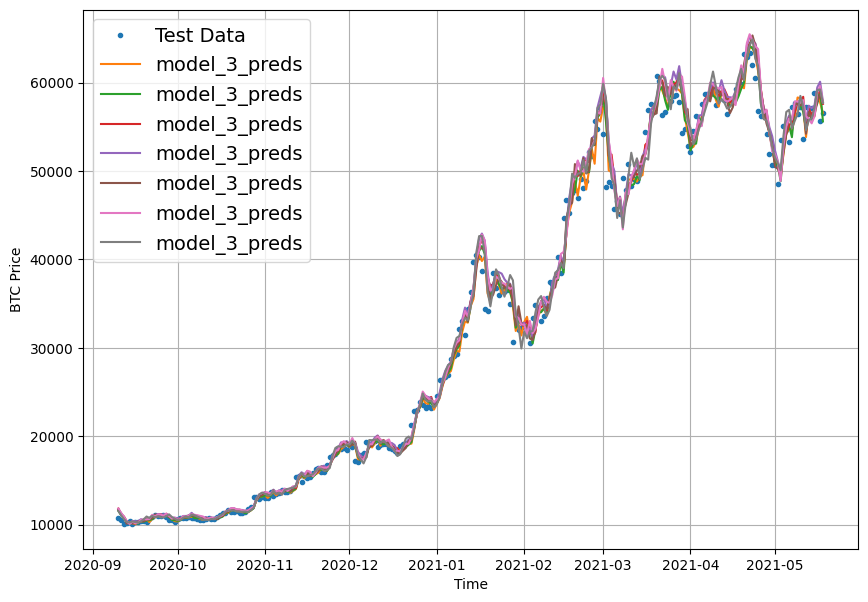

In [78]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

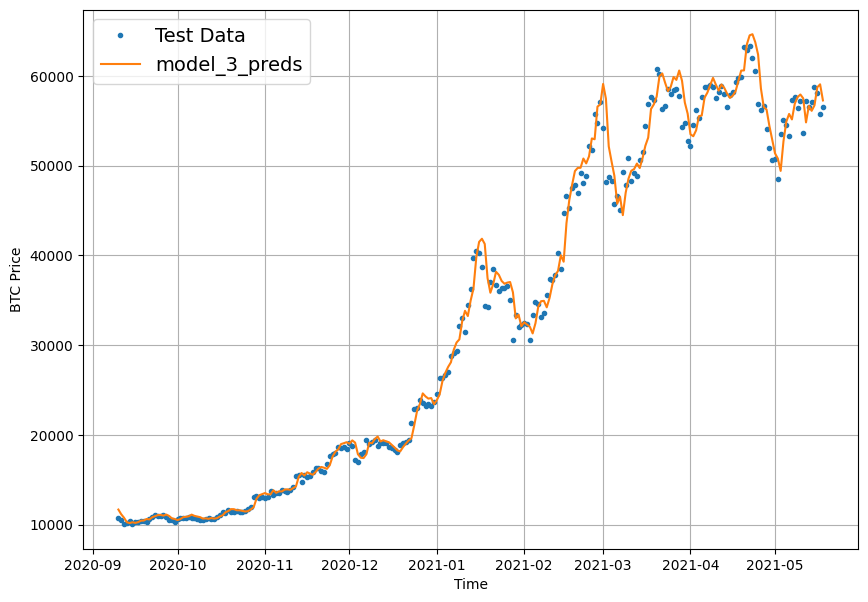

In [79]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

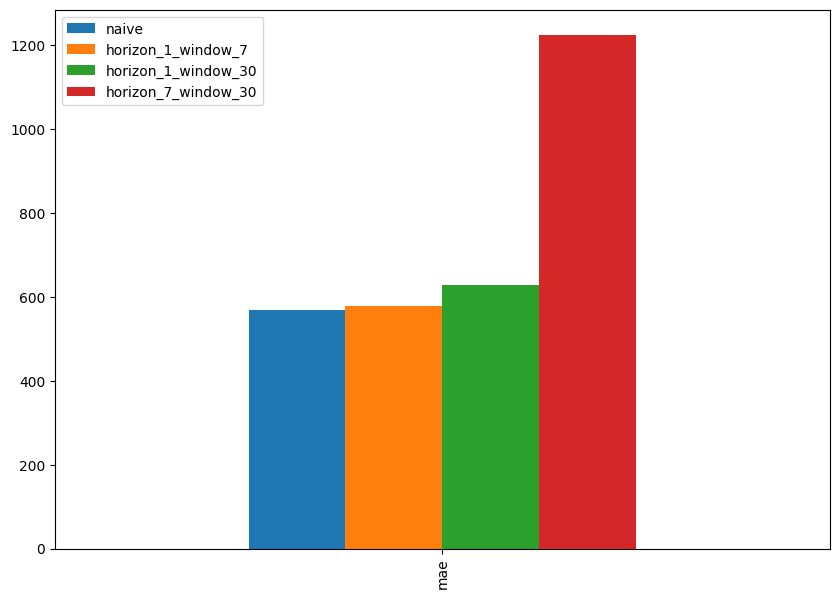

In [80]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [81]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [82]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [83]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [84]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [85]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [86]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [87]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [88]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 20s - loss: 3311.2993

18/18 [==============================] - 3s 102ms/step - loss: 1685.9277 - val_loss: 1399.4822
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 311.6253 - val_loss: 1554.9226
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 221.8668

18/18 [==============================] - 2s 115ms/step - loss: 219.8514 - val_loss: 1053.0908
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 197.0018

18/18 [==============================] - 3s 148ms/step - loss: 190.8033 - val_loss: 1026.6909
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 187.8741

18/18 [==============================] - 1s 81ms/step - loss: 182.7142 - val_loss: 1007.2227
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 136.6316

18/18 [==============================] - 1s 49ms/step - loss: 179.6582 - val_loss: 1005.6174
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 221.6164

18/18 [==============================] - 1s 73ms/step - loss: 177.8168 - val_loss: 976.3582
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 173.5848 - val_loss: 981.6678
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 171.3588 - val_loss: 981.0680
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 185.6904

18/18 [==============================] - 1s 48ms/step - loss: 168.8226 - val_loss: 946.0847
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 187.7583

18/18 [==============================] - 1s 48ms/step - loss: 166.3439 - val_loss: 921.8210
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 167.7418 - val_loss: 947.9030
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 162.8893 - val_loss: 943.4567
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 175.7900

18/18 [==============================] - 1s 52ms/step - loss: 158.2375 - val_loss: 896.0163
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 156.9811 - val_loss: 899.7503
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 146.2128

18/18 [==============================] - 1s 48ms/step - loss: 152.2202 - val_loss: 850.4826
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 150.2174 - val_loss: 875.6566
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 155.4670

18/18 [==============================] - 1s 49ms/step - loss: 148.7372 - val_loss: 842.4136
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 145.2967 - val_loss: 845.0327
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 156.7076

18/18 [==============================] - 1s 48ms/step - loss: 144.9079 - val_loss: 811.5762
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 201.2926

18/18 [==============================] - 1s 66ms/step - loss: 144.2487 - val_loss: 783.7480
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 141.3807 - val_loss: 793.5299
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 136.5305

18/18 [==============================] - 1s 71ms/step - loss: 137.7526 - val_loss: 782.6176
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 153.4626

18/18 [==============================] - 1s 50ms/step - loss: 137.9727 - val_loss: 777.7955
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 144.8418

18/18 [==============================] - 1s 49ms/step - loss: 135.1243 - val_loss: 752.9706
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 132.9317

18/18 [==============================] - 1s 47ms/step - loss: 133.5507 - val_loss: 740.1609
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 197.8364

18/18 [==============================] - 1s 74ms/step - loss: 133.0570 - val_loss: 722.9335
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 132.0119

18/18 [==============================] - 1s 49ms/step - loss: 129.5154 - val_loss: 720.4981
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 124.3882

18/18 [==============================] - 1s 49ms/step - loss: 128.3020 - val_loss: 706.1672
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 129.4544 - val_loss: 747.3022
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 131.8327 - val_loss: 790.3346
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 129.0919 - val_loss: 732.4883
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0475 - val_loss: 708.0306
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 139.1933

18/18 [==============================] - 1s 47ms/step - loss: 124.1016 - val_loss: 685.2273
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 110.1642

18/18 [==============================] - 1s 47ms/step - loss: 122.7510 - val_loss: 678.3611
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 126.2151 - val_loss: 784.5652
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 169.2765

18/18 [==============================] - 1s 48ms/step - loss: 124.7599 - val_loss: 676.3662
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9683

18/18 [==============================] - 1s 47ms/step - loss: 120.2794 - val_loss: 652.8007
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 132.1488

18/18 [==============================] - 1s 47ms/step - loss: 119.6291 - val_loss: 648.5353
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 113.3707

18/18 [==============================] - 1s 65ms/step - loss: 118.1949 - val_loss: 647.9286
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8808

18/18 [==============================] - 1s 69ms/step - loss: 118.6241 - val_loss: 637.5694
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 120.2878 - val_loss: 642.4815
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 118.1118 - val_loss: 657.3781
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7337 - val_loss: 642.9282
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8547 - val_loss: 642.1354
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 91.2573

18/18 [==============================] - 1s 48ms/step - loss: 116.6866 - val_loss: 625.9229
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4951 - val_loss: 695.3670
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9738 - val_loss: 672.1624
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 171.2689

18/18 [==============================] - 1s 51ms/step - loss: 116.7952 - val_loss: 621.0084
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 116.2166 - val_loss: 627.6360
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 95.3987

18/18 [==============================] - 1s 74ms/step - loss: 115.9998 - val_loss: 611.6448
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9105 - val_loss: 627.9163
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8285 - val_loss: 620.7128
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 124.6188 - val_loss: 644.3345
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 135.9174

18/18 [==============================] - 1s 49ms/step - loss: 115.4078 - val_loss: 602.8171
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5872 - val_loss: 787.7704
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 137.4302 - val_loss: 607.1116
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6273 - val_loss: 679.0120
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4001 - val_loss: 617.9651
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5870 - val_loss: 622.9020
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3996 - val_loss: 612.3840
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 82.2264

18/18 [==============================] - 1s 48ms/step - loss: 112.0315 - val_loss: 594.9081
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7321 - val_loss: 598.7758
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8248 - val_loss: 676.9375
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7903 - val_loss: 606.7994
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 120.9312

18/18 [==============================] - 1s 49ms/step - loss: 111.6972 - val_loss: 593.2483
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9026 - val_loss: 630.6182
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8282 - val_loss: 707.8562
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0460 - val_loss: 662.1024
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 128.3777

18/18 [==============================] - 1s 49ms/step - loss: 119.7599 - val_loss: 592.4817
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2141 - val_loss: 626.7137
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3372 - val_loss: 600.1610
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1380 - val_loss: 594.1188
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 164.0510

18/18 [==============================] - 1s 50ms/step - loss: 110.9097 - val_loss: 584.0112
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9548 - val_loss: 606.8090
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 80.1978

18/18 [==============================] - 1s 49ms/step - loss: 110.3158 - val_loss: 582.4215
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4787 - val_loss: 591.6967
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6803 - val_loss: 582.9244
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7039 - val_loss: 618.0314
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7556 - val_loss: 587.7049
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1145 - val_loss: 588.1696
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5265 - val_loss: 606.6323
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0138 - val_loss: 614.4466
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9810 - val_loss: 591.0167
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 10

18/18 [==============================] - 1s 72ms/step - loss: 109.5362 - val_loss: 582.0476
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4941 - val_loss: 583.5002
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4440 - val_loss: 720.3381
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2565 - val_loss: 582.8687
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4021 - val_loss: 596.8333
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3172 - val_loss: 624.6097
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 148.3387

18/18 [==============================] - 1s 49ms/step - loss: 111.3703 - val_loss: 576.9006
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2262 - val_loss: 593.2958
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 108.5775 - val_loss: 578.0475
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2319 - val_loss: 593.9274
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4377 - val_loss: 580.0071
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 152.9038

18/18 [==============================] - 1s 47ms/step - loss: 111.0880 - val_loss: 575.5251
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 116.5731 - val_loss: 607.7127


In [89]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 607.7127


607.7127075195312

In [91]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 575.5251


575.5250854492188

In [92]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [93]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 2ms/step


((556, 1), TensorShape([556]))

In [94]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 575.5251,
 'mse': 1190708.6,
 'rmse': 1091.1959,
 'mape': 2.5625505,
 'mase': 1.0110382}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [95]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [96]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2584.8975

18/18 [==============================] - 4s 170ms/step - loss: 2544.1724 - val_loss: 10560.6621
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1112.3634

18/18 [==============================] - 3s 153ms/step - loss: 860.2788 - val_loss: 1043.7152
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 249.0065 - val_loss: 1115.7200
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 208.2956

18/18 [==============================] - 3s 156ms/step - loss: 196.6791 - val_loss: 1020.3506
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 183.9895 - val_loss: 1043.0466
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 178.5888

18/18 [==============================] - 2s 130ms/step - loss: 179.7652 - val_loss: 998.2051
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 176.3136 - val_loss: 999.7350
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 169.4604

18/18 [==============================] - 3s 159ms/step - loss: 174.4657 - val_loss: 998.0414
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 172.8704 - val_loss: 998.8359
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 166.6808

18/18 [==============================] - 2s 128ms/step - loss: 171.7674 - val_loss: 971.3420
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 171.4870 - val_loss: 971.5346
Epoch 12/100
10/18 [===============>..............] - ETA: 0s - loss: 171.8646

18/18 [==============================] - 3s 172ms/step - loss: 170.0554 - val_loss: 964.9904
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 168.1049 - val_loss: 970.8142
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 167.0775 - val_loss: 980.6899
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 169.5951

18/18 [==============================] - 2s 127ms/step - loss: 166.7279 - val_loss: 952.7440
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 164.4811

18/18 [==============================] - 3s 156ms/step - loss: 164.4811 - val_loss: 915.4009
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 162.6349 - val_loss: 986.3298
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 162.7512 - val_loss: 956.6918
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 160.4457 - val_loss: 950.4848
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 166.7205

18/18 [==============================] - 2s 126ms/step - loss: 159.6321 - val_loss: 889.1658
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 157.0698

18/18 [==============================] - 3s 191ms/step - loss: 157.0698 - val_loss: 886.6177
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 163.0724

18/18 [==============================] - 3s 155ms/step - loss: 155.8143 - val_loss: 877.5040
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 155.5935 - val_loss: 913.1847
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 153.0628 - val_loss: 888.4323
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 151.6882

18/18 [==============================] - 2s 126ms/step - loss: 151.6882 - val_loss: 856.2620
Epoch 26/100
18/18 [==============================] - 0s 9ms/step - loss: 150.1462 - val_loss: 859.3356
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 157.8349

18/18 [==============================] - 3s 165ms/step - loss: 148.5780 - val_loss: 839.6179
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 147.5041

18/18 [==============================] - 2s 127ms/step - loss: 147.5041 - val_loss: 824.8201
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 146.1714 - val_loss: 826.2367
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 145.5202 - val_loss: 836.1226
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 147.7188

18/18 [==============================] - 3s 160ms/step - loss: 143.8050 - val_loss: 798.7947
Epoch 32/100
18/18 [==============================] - 0s 13ms/step - loss: 142.9695 - val_loss: 799.3834
Epoch 33/100
18/18 [==============================] - 0s 13ms/step - loss: 142.5790 - val_loss: 846.1631
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 147.5137

18/18 [==============================] - 2s 137ms/step - loss: 141.7805 - val_loss: 774.5904
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 139.0670 - val_loss: 795.0233
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 139.7859

18/18 [==============================] - 2s 127ms/step - loss: 139.7859 - val_loss: 767.5909
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 138.3085 - val_loss: 786.5644
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 145.5447

18/18 [==============================] - 3s 163ms/step - loss: 136.8004 - val_loss: 752.2433
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 139.3256

18/18 [==============================] - 2s 129ms/step - loss: 135.5464 - val_loss: 745.5677
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 134.4653 - val_loss: 760.2786
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 139.3237

18/18 [==============================] - 3s 173ms/step - loss: 133.0406 - val_loss: 731.1205
Epoch 42/100
18/18 [==============================] - 0s 11ms/step - loss: 131.9263 - val_loss: 734.3790
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 131.0737 - val_loss: 733.2968
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 129.6730

18/18 [==============================] - 2s 127ms/step - loss: 129.6730 - val_loss: 715.1127
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 128.7828

18/18 [==============================] - 2s 126ms/step - loss: 128.7712 - val_loss: 710.0037
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 128.8421 - val_loss: 735.0309
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 119.6913

18/18 [==============================] - 3s 160ms/step - loss: 128.8238 - val_loss: 706.6599
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 126.9362 - val_loss: 712.2069
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 126.4685

18/18 [==============================] - 2s 128ms/step - loss: 126.4685 - val_loss: 704.8983
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 130.5148 - val_loss: 726.7095
Epoch 51/100
18/18 [==============================] - 0s 14ms/step - loss: 130.0412 - val_loss: 764.3963
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 133.1658

18/18 [==============================] - 3s 170ms/step - loss: 133.1658 - val_loss: 679.0264
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 126.8271

18/18 [==============================] - 2s 126ms/step - loss: 127.3315 - val_loss: 675.5718
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 124.3181 - val_loss: 685.9968
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 122.6851 - val_loss: 677.0036
Epoch 56/100
10/18 [===============>..............] - ETA: 0s - loss: 128.2638

18/18 [==============================] - 3s 161ms/step - loss: 123.3374 - val_loss: 668.4208
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 123.9538 - val_loss: 681.2716
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 121.1679

18/18 [==============================] - 2s 131ms/step - loss: 121.3221 - val_loss: 658.2079
Epoch 59/100
10/18 [===============>..............] - ETA: 0s - loss: 116.9148

18/18 [==============================] - 2s 140ms/step - loss: 120.0017 - val_loss: 654.3239
Epoch 60/100
18/18 [==============================] - 0s 13ms/step - loss: 120.4211 - val_loss: 666.6691
Epoch 61/100
18/18 [==============================] - 0s 12ms/step - loss: 120.8635 - val_loss: 695.1630
Epoch 62/100
18/18 [==============================] - 0s 13ms/step - loss: 123.1407 - val_loss: 721.5038
Epoch 63/100
18/18 [==============================] - 0s 13ms/step - loss: 123.5246 - val_loss: 658.0344
Epoch 64/100
18/18 [==============================] - 0s 14ms/step - loss: 118.0043 - val_loss: 656.3619
Epoch 65/100
13/18 [====================>.........] - ETA: 0s - loss: 118.6242

18/18 [==============================] - 3s 149ms/step - loss: 118.6216 - val_loss: 638.0413
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 117.6814 - val_loss: 658.2526
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0327

18/18 [==============================] - 4s 259ms/step - loss: 118.3228 - val_loss: 635.8040
Epoch 68/100
10/18 [===============>..............] - ETA: 0s - loss: 114.5435

18/18 [==============================] - 3s 158ms/step - loss: 117.4697 - val_loss: 632.4359
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 119.7395 - val_loss: 636.0001
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 117.3023

18/18 [==============================] - 3s 161ms/step - loss: 117.0955 - val_loss: 628.9648
Epoch 71/100
18/18 [==============================] - 0s 13ms/step - loss: 116.8907 - val_loss: 665.1550
Epoch 72/100
18/18 [==============================] - 0s 14ms/step - loss: 120.1107 - val_loss: 645.4664
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0689

18/18 [==============================] - 2s 134ms/step - loss: 118.0301 - val_loss: 623.8008
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2537 - val_loss: 641.7090
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 116.1210 - val_loss: 651.6977
Epoch 76/100
16/18 [=========================>....] - ETA: 0s - loss: 117.4019

18/18 [==============================] - 2s 129ms/step - loss: 116.1607 - val_loss: 617.3130
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 115.1735 - val_loss: 660.3579
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 117.5745 - val_loss: 647.5588
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 114.0285

18/18 [==============================] - 3s 158ms/step - loss: 115.9259 - val_loss: 613.4092
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2180 - val_loss: 636.0312
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8030 - val_loss: 646.5030
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 117.2925 - val_loss: 619.7707
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 114.5666 - val_loss: 664.6273
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2341 - val_loss: 625.2166
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 115.5999 - val_loss: 624.3843
Epoch 86/100
18/18 [==============================] - 0s 9ms/step - loss: 115.9359 - val_loss: 617.8480
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 114.6441

18/18 [==============================] - 3s 153ms/step - loss: 114.0394 - val_loss: 604.4029
Epoch 88/100
18/18 [==============================] - 0s 13ms/step - loss: 112.6345 - val_loss: 611.5698
Epoch 89/100
18/18 [==============================] - 0s 12ms/step - loss: 112.5264 - val_loss: 625.3377
Epoch 90/100
18/18 [==============================] - 0s 14ms/step - loss: 117.1920 - val_loss: 638.6221
Epoch 91/100
18/18 [==============================] - 0s 14ms/step - loss: 115.5384 - val_loss: 628.0248
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 112.6875

18/18 [==============================] - 2s 139ms/step - loss: 113.1731 - val_loss: 601.9733
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3750 - val_loss: 612.4672
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 112.9212 - val_loss: 616.7411
Epoch 95/100
18/18 [==============================] - 0s 9ms/step - loss: 112.5125 - val_loss: 609.0809
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5140 - val_loss: 628.2272
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 125.3933 - val_loss: 611.7468
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 116.9595 - val_loss: 603.5431
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 112.6562

18/18 [==============================] - 2s 129ms/step - loss: 114.0605 - val_loss: 599.9948
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 117.0627 - val_loss: 609.0854


In [97]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.9948


599.9948120117188

In [98]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 3ms/step


(556, 1)

In [99]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 599.9949,
 'mse': 1277900.9,
 'rmse': 1130.4427,
 'mape': 2.7101803,
 'mase': 1.0540248}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [100]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [101]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [102]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [103]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [104]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [105]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [106]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [107]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [108]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [109]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

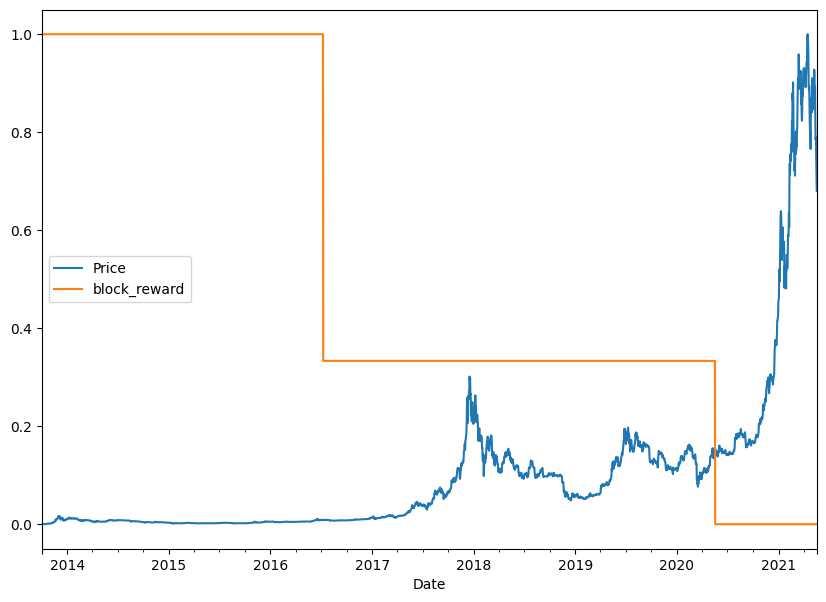

In [110]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [111]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [112]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe. Yani mesela 2013-10-08	bu tarihteki price+1 den başlayıp price+7 ye kadar olan valuelar bizim bildiğimiz windowumuz train için kullandığımız datamız yani üstteki modellerde nasıl yaptıysak onun aynısı. Price columndaki değer de bizim actual horizonumuz. Yani biz window label ayırma işini aslında pandas dataframe i ile yaptık yaptıgımız baska bir sey degil.

In [113]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
# Bu işlem, "price" sütununu veri çerçevesinden kaldırır ve sonucunda "Price" sütunu olmayan yeni bir DataFrame döndürür. Bu nedenle, axis=1 kullanarak sütun bazlı bir işlem gerçekleştirilir. Eğer axis=0 olarak ayarlarsanız, satırlar üzerinde işlem yaparsınız ve belirlediğiniz satırı çıkarırsınız.
# .dropna ile DataFrame imizdeki içinde NAN olan rowların hepsini kaldırıyor.
# Price columnu ayırmamızın sebebi biz X ile windowlarımızı oluşturuyoruz. Price columnu bizim horizon değerlerimizi tutuyor.
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [114]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

# Make train/test sets using indexing

In [115]:
split_size = int(len(X) * 0.8)
X_train , y_train = X[ : split_size] , y[ : split_size]
X_test , y_test = X[ split_size: ] , y[ split_size : ]

len( X_train) , len(y_train)  , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [116]:
y_train

Date
2013-10-08     123.032997
2013-10-09     124.049004
2013-10-10     125.961159
2013-10-11     125.279663
2013-10-12     125.927498
                 ...     
2019-11-05    9369.627930
2019-11-06    9326.599609
2019-11-07    9335.751953
2019-11-08    9226.485352
2019-11-09    8794.358398
Name: Price, Length: 2224, dtype: float32

In [117]:
X_train.shape , y_train.shape

((2224, 8), (2224,))

# Model 6 : Same as model 1 but with block_reward

In [118]:
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(HORIZON)
    ] , name = "model_6_multivariate"
)
# Compile a model
model_6.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model
model_6.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = (X_test , y_test) ,
    batch_size = 128 ,
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 19s - loss: 3378.2690

18/18 [==============================] - 2s 45ms/step - loss: 1441.9493 - val_loss: 2516.8645
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 377.7473

18/18 [==============================] - 1s 37ms/step - loss: 372.6228 - val_loss: 1890.5144
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 247.2216

18/18 [==============================] - 1s 35ms/step - loss: 216.0033 - val_loss: 1288.2443
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 237.0430

18/18 [==============================] - 1s 35ms/step - loss: 186.1705 - val_loss: 1044.0714
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 166.3032

18/18 [==============================] - 1s 35ms/step - loss: 178.8705 - val_loss: 980.5925
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4824

18/18 [==============================] - 1s 35ms/step - loss: 176.8481 - val_loss: 962.8696
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 213.4067

18/18 [==============================] - 1s 35ms/step - loss: 165.5969 - val_loss: 935.0662
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3640

18/18 [==============================] - 1s 35ms/step - loss: 158.9901 - val_loss: 863.0204
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 155.1547 - val_loss: 909.8090
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 171.4522

18/18 [==============================] - 1s 35ms/step - loss: 147.1158 - val_loss: 784.2587
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 154.0505

18/18 [==============================] - 1s 34ms/step - loss: 138.2005 - val_loss: 767.5408
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 132.5125 - val_loss: 776.8409
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 104.1488

18/18 [==============================] - 1s 36ms/step - loss: 130.5186 - val_loss: 739.4432
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 131.5348

18/18 [==============================] - 1s 42ms/step - loss: 123.5661 - val_loss: 700.6132
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 127.0794 - val_loss: 707.1453
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 122.1069 - val_loss: 708.3687
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 110.3722

18/18 [==============================] - 1s 49ms/step - loss: 117.4336 - val_loss: 699.2468
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 135.6437

18/18 [==============================] - 1s 50ms/step - loss: 118.2094 - val_loss: 631.6773
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2401 - val_loss: 660.2217
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 128.1751

18/18 [==============================] - 1s 39ms/step - loss: 115.1103 - val_loss: 618.7178
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0032

18/18 [==============================] - 1s 35ms/step - loss: 116.5835 - val_loss: 615.5300
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3128

18/18 [==============================] - 1s 34ms/step - loss: 115.0921 - val_loss: 611.1126
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 121.7102

18/18 [==============================] - 1s 35ms/step - loss: 115.2198 - val_loss: 605.3555
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2183 - val_loss: 609.1526
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5411 - val_loss: 606.0579
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0368 - val_loss: 628.4102
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 164.3631

18/18 [==============================] - 1s 36ms/step - loss: 114.6852 - val_loss: 597.3349
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 101.9247

18/18 [==============================] - 1s 59ms/step - loss: 111.0220 - val_loss: 593.1883
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2925 - val_loss: 642.8424
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 128.8275

18/18 [==============================] - 1s 34ms/step - loss: 118.6382 - val_loss: 591.2249
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3301 - val_loss: 630.1542
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 114.5658

18/18 [==============================] - 1s 34ms/step - loss: 112.0508 - val_loss: 591.2235
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3334 - val_loss: 618.8290
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4088 - val_loss: 604.1078
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 101.3730

18/18 [==============================] - 1s 35ms/step - loss: 110.5106 - val_loss: 585.2655
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0930 - val_loss: 611.2197
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8066 - val_loss: 592.6138
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 101.5694

18/18 [==============================] - 1s 34ms/step - loss: 110.7581 - val_loss: 583.5167
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8947

18/18 [==============================] - 1s 34ms/step - loss: 109.5976 - val_loss: 582.7894
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2016 - val_loss: 590.2820
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8571 - val_loss: 649.3617
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6916 - val_loss: 628.5466
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 114.6004 - val_loss: 646.9537
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3177 - val_loss: 629.9604
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5451 - val_loss: 595.1003
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 80.2777

18/18 [==============================] - 1s 34ms/step - loss: 111.5962 - val_loss: 579.1854
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5671 - val_loss: 608.9326
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5660 - val_loss: 591.3367
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0919 - val_loss: 605.9572
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3726 - val_loss: 600.1357
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8712 - val_loss: 587.7156
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 114.5700

18/18 [==============================] - 1s 34ms/step - loss: 110.6938 - val_loss: 577.7490
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0539 - val_loss: 600.5457
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 100.8449

18/18 [==============================] - 1s 42ms/step - loss: 111.2374 - val_loss: 577.1877
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8589 - val_loss: 579.4339
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8169 - val_loss: 787.5342
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 130.1121 - val_loss: 683.4495
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7159 - val_loss: 653.7131
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0068 - val_loss: 624.4288
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0243 - val_loss: 620.3727
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9635 - val_loss: 582.7446
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 108.7808 - val_loss: 586.4922
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 50ms/step - loss: 109.7244 - val_loss: 574.4258
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2857 - val_loss: 574.8270
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7236 - val_loss: 611.9717
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9082 - val_loss: 740.2529
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 126.1855 - val_loss: 655.5881
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 120.9967 - val_loss: 577.6862
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7954 - val_loss: 592.8391
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 100.7980

18/18 [==============================] - 1s 34ms/step - loss: 108.2952 - val_loss: 572.3430
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9994 - val_loss: 575.6047
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2569 - val_loss: 575.4173
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2484 - val_loss: 573.2350
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 76.6677

18/18 [==============================] - 1s 35ms/step - loss: 108.9760 - val_loss: 571.8319
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6775 - val_loss: 577.4422
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1107 - val_loss: 576.3874
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0143 - val_loss: 623.6053
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9616 - val_loss: 593.1230
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9217 - val_loss: 572.5704
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6141

18/18 [==============================] - 1s 35ms/step - loss: 114.5419 - val_loss: 570.9017
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5392 - val_loss: 619.0199
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5250 - val_loss: 571.6418
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7486 - val_loss: 571.9869
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 105.7802 - val_loss: 628.4410
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 114.8269 - val_loss: 602.9792
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0900 - val_loss: 584.3676
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 104.2520

18/18 [==============================] - 1s 35ms/step - loss: 110.1691 - val_loss: 570.6660
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 105.3017 - val_loss: 605.2729
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7719 - val_loss: 600.2198
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 108.2297 - val_loss: 584.2195
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2362 - val_loss: 615.4133
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1704 - val_loss: 586.8782
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9225 - val_loss: 570.7881
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0031 - val_loss: 604.4642
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1442 - val_loss: 614.9112
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 10

18/18 [==============================] - 1s 36ms/step - loss: 106.5959 - val_loss: 570.3433
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 110.4764 - val_loss: 617.3265


In [119]:
# Load the best performing model_6
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate/")
model_6.evaluate(X_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 570.3433


570.3433227539062

In [120]:
# Make predictions
model_6_preds = model_6.predict(X_test)
model_6_preds.shape


18/18 [==============================] - 0s 1ms/step


(556, 1)

In [121]:
y_test.shape

(556,)

In [122]:
model_6_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_6_preds)
)
model_6_results

{'mae': 570.34326,
 'mse': 1168846.8,
 'rmse': 1081.1322,
 'mape': 2.5603917,
 'mase': 1.0019351}

# Model 7 : N-BEATS Algorithm
Lets now try to build the biggest baddest ( though maybe not the baddest , as in , it performly very well ) time series forecasting model we have built so far.

More spesifically , we are going to replicating the algorithm in figure 1 from the paper : https://arxiv.org/pdf/1905.10437.pdf

* We will see how to use tensorflow layer subclassing ( to make our own custom layers.)
* Get experience using the functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the NBEATS block layer

Because the NBEATS block layer doesnt exist in tensorflow , we have got to create this.

To create custom layers and models in tensorflow , we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

Note : Fully connected layers means Dense layers.


In [123]:
# Create NBeatBlock custom layer. We are using subclassing because to create a layer in a network doesnt already exist in tensorflow.
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self ,
               input_size : int ,
               theta_size : int ,
               horizon : int ,
               n_neurons : int ,
               n_layers : int ,
               **kwargs   # the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape , trainable , name )(bütün default valueları biz girmemiş olsak bile **kwargs ile onları da default olarak eklemiş oluyoruz.)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size   # If you want to initialize some variables in class , you should use self.variable_name = something.
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons , activation = "relu") for _ in range(n_layers)]  # We will put 4 for n_layers later.

    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation = "linear" , name = "theta")

    # Now we will describe our data how to go from the inputs to outputs with call method. (call method layer olustururken her zaman zorunlu)
  def call(self , inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)   # x will get updated contiunally as it passes through each layer in the fully connected stack.
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast , forecast = theta[ : , : self.input_size ] , theta[ : , -self.horizon : ]
    return backcast , forecast    # It is trying to use the backcast to improve its forecast positions.
    # backcast, theta'nın başlangıcından input_size boyutuna kadar olan bölümünü temsil eder. Bu, geçmiş zaman adımlarına ilişkin tahminlemeyi içerir.
    # forecast, theta'nın sonundan -horizon boyutuna kadar olan bölümünü temsil eder. Bu, gelecekteki zaman adımlarına ilişkin tahminlemeyi içerir.





Lets test our NBeatsBlock class

To do , we will make some dummy inputs and outputs



In [124]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE ,
    theta_size = WINDOW_SIZE + HORIZON , # Because our theta includes backcast and forecast , backcast acts like our input and forecast acts like our output, so we should use WINDOW_SIZE + HORIZON
    horizon = HORIZON ,
    n_neurons = 128 ,
    n_layers = 4
)

In [125]:
# Create a dummy inputs (have to be same shape with input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,  axis = 0)  #  Dense layers should have (batch_size , input_dim) shape , so it would be 2D input with shape  (batch_size , input_dim)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [126]:
# Pass dummy inputs to dummy NBeatsBlock
backcast , forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")

Backcast : [ 0.3865638   0.10983741 -0.55873215  0.40706497  0.23237641  0.30994457
  0.15456794]
Forecast : 0.7093722820281982


### Preparing data for the N-BEATS algorithm using 'tf.data' for faster training.

In [127]:
HORIZON = 1
WINDOW_SIZE = 7

In [128]:
# Create N-BEATS data inputs ( N-BEATS works with univariate time series )
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [129]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [130]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [131]:
# Time to make our dataset performant using tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset ,train_labels_dataset ))
test_dataset = tf.data.Dataset.zip((test_features_dataset ,test_labels_dataset ))

In [132]:
train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters , we will tune our parameters using our paper , Table 18

We are using N-BEATS G(generic) algorithm and also we are going to use Daily forecast (Dly)

In [133]:
# Values from N-BEATS papers.
N_EPOCHS = 5000 # In paper , they say iterations for epochs.
N_NEURONS = 512 # In paper , they say Width
N_LAYERS = 4 # Our block network has 4 fully connected layers.
N_STACKS = 30 # Our algorihtm needs 30 stacks (written in paper)

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE , THETA_SIZE

(7, 8)

 Bizim modelimiz çok deep oldugunda (yani cok fazla hidden layer icerdiginde) output layera yaklasırken artık weightsler aşırı küçük oluyor ve bunlar küçük değerlerinden dolayı kaybolabiliyor(artık modelimiz untrainable hale geliyor bu sebepten dolayı). Biz bunu istemiyoruz. Bu yüzden residual neural network kullanıyoruz. Bu bize eğerki weightslerimiz çok küçüldüyse ve kaybolacaksa son hidden layerları atlayıp direkt output layera gelmesini sağlıyor.

## Getting ready for residual connections

Before we can craft our N-BEAST model , we need two layers for the residual connections(add and subtract)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 in paper)

https://paperswithcode.com/method/resnet

In [134]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1 , tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [135]:
# Subtract
subtracted = tf.keras.layers.subtract( [ tensor_1 , tensor_2 ] )

# Add
added = tf.keras.layers.add( [ tensor_1 , tensor_2 ] )

subtracted.numpy() , added.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

### Building , compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS Block layer using ' NBeatsBlock' (this will be the initial block used for the network , the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack ( we will be using the keras functional API)
3. Make the initial backcast and forecasts for the model with the layer created in step 1
4. Use for loop to create stacks of block layers
5. Use the ' NBeatsBlock ' class within the for loop in step 4 to create blocks which return backcasts and block level forecasts.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together with tf.keras.Model().
8. Compile the model with MAE loss and Adam optimizer with default settings.
9. Fit the N-BEAST model for 5000 epochs and since it's fitting for so many epochs , we will use a couple of callbacks :  
  * Early Stopping - Because the model will be training for so long , we will stop it early if it stops improving.
  * Reduce Learning Rate on Plateau - If model stops improving , try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).


In [136]:
%%time

tf.random.set_seed(42)

# Step 1: Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(
    input_size = INPUT_SIZE ,
    theta_size = THETA_SIZE ,
    horizon = HORIZON ,
    n_neurons = N_NEURONS ,
    n_layers = N_LAYERS ,
    name = "InitialBlock"
)

# Step 2 : Create an input layer to stacks
stack_input = tf.keras.layers.Input( shape = (INPUT_SIZE)  , name = "stack_input")

# Step 3 : Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals , forecast = nbeats_block_layer(stack_input)  # Residuals burda backcast döndürüyor.

# Step 4 : Create stacks of block layers.
for i , _ in enumerate(range(N_STACKS - 1)):  # -1 yapmamızın sebebi biz toplam 30 stack istiyoruz fakat bizim ilk stack layerımız nbeats_block_layer(stack_input) burdan zaten geliyor o yüzden bunu çıkarmış oluyoruz -1 ile.
  # Step 5 : Use the NBeastBlock to calculate the backcast as well as the forecast
  backcast , block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE ,
      theta_size = THETA_SIZE ,
      horizon = HORIZON ,
      n_neurons = N_NEURONS ,
      n_layers = N_LAYERS ,
      name = f"NBeatBlock_{i}"
  )(residuals)  # Pass in the residuals.

  # Step 6 : Create the double residual stacking
  residuals = tf.keras.layers.subtract( [ residuals , backcast ]  , name = f"Subtract_{i}")
  forecast = layers.add( [ forecast , block_forecast ] , name = f"Add_{i}" )

# Step 7 : Put the stack model together
model_7 = tf.keras.Model( stack_input , forecast , name = "model_7_NBEATS")

# Step 8 : Compile a model
model_7.compile( loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                 )
# Step 9 : Fit the model
model_7.fit(
    train_dataset ,
    epochs = N_EPOCHS ,
    validation_data = test_dataset ,
    callbacks = [ tf.keras.callbacks.EarlyStopping(monitor = "val_loss" ,
                                                   patience = 200 , # If our model doesnt improve for 200 epochs , it's going to restore its best weights and stop training.
                                                   restore_best_weights = True
                                                   )  ,
                  tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss" ,
                                                       patience = 100 , # If our model doesnt improve for 100 epochs , it's going to reduce our learning rate with 0.1 * (our learning rate)
                                                       verbose = 1
                                                       )
                  ]

)

Epoch 1/5000
3/3 [==============================] - 40s 3s/step - loss: 36053.6992 - val_loss: 17836.2539 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 7s 2s/step - loss: 4856.7622 - val_loss: 15853.3291 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 8s 2s/step - loss: 789.1093 - val_loss: 1098.8170 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 8s 3s/step - loss: 1172.0668 - val_loss: 2718.3525 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 7s 2s/step - loss: 845.2732 - val_loss: 6759.2393 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 7s 2s/step - loss: 1539.6205 - val_loss: 7737.8779 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 8s 2s/step - loss: 658.8478 - val_loss: 1079.0164 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 8s 3s/step - loss: 207.3155 - val_loss: 1522.6348 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - 7s 2s/step - loss: 2

KeyboardInterrupt: ignored

In [137]:
# Evaluate our N-BEATS model
model_7.evaluate(test_dataset)


1/1 [==============================] - 1s 577ms/step - loss: 715.6410


715.6409912109375

In [138]:
# Make predictions with our model
model_7_preds = model_7.predict(test_dataset)
model_7_preds


1/1 [==============================] - 2s 2s/step


array([[ 8765.234 ],
       [ 8666.869 ],
       [ 8832.051 ],
       [ 8632.587 ],
       [ 8580.911 ],
       [ 8576.945 ],
       [ 8523.207 ],
       [ 8382.185 ],
       [ 8322.238 ],
       [ 8357.2   ],
       [ 8138.7915],
       [ 8005.6597],
       [ 7945.9126],
       [ 7620.275 ],
       [ 7270.3276],
       [ 7201.5957],
       [ 7017.1724],
       [ 7041.679 ],
       [ 7008.018 ],
       [ 7251.8115],
       [ 7250.585 ],
       [ 7500.7812],
       [ 7446.5435],
       [ 7298.346 ],
       [ 7224.4062],
       [ 7195.659 ],
       [ 7108.126 ],
       [ 7196.766 ],
       [ 7311.884 ],
       [ 7360.1846],
       [ 7387.191 ],
       [ 7253.763 ],
       [ 7149.702 ],
       [ 7087.7744],
       [ 7062.4556],
       [ 7079.1543],
       [ 6985.052 ],
       [ 6971.216 ],
       [ 6819.948 ],
       [ 6568.947 ],
       [ 7044.0234],
       [ 7037.8247],
       [ 6998.427 ],
       [ 7102.512 ],
       [ 7118.5205],
       [ 7054.5225],
       [ 7069.2153],
       [ 7076

In [139]:
y_test.shape

(556,)

In [140]:
model_7_preds.shape

(556, 1)

In [141]:
# Evaluate model_7_preds
model_7_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_7_preds)
)
model_7_results

{'mae': 715.641,
 'mse': 1514397.2,
 'rmse': 1230.6085,
 'mape': 3.317735,
 'mase': 1.257183}

### Plot the N-BEATS architecture

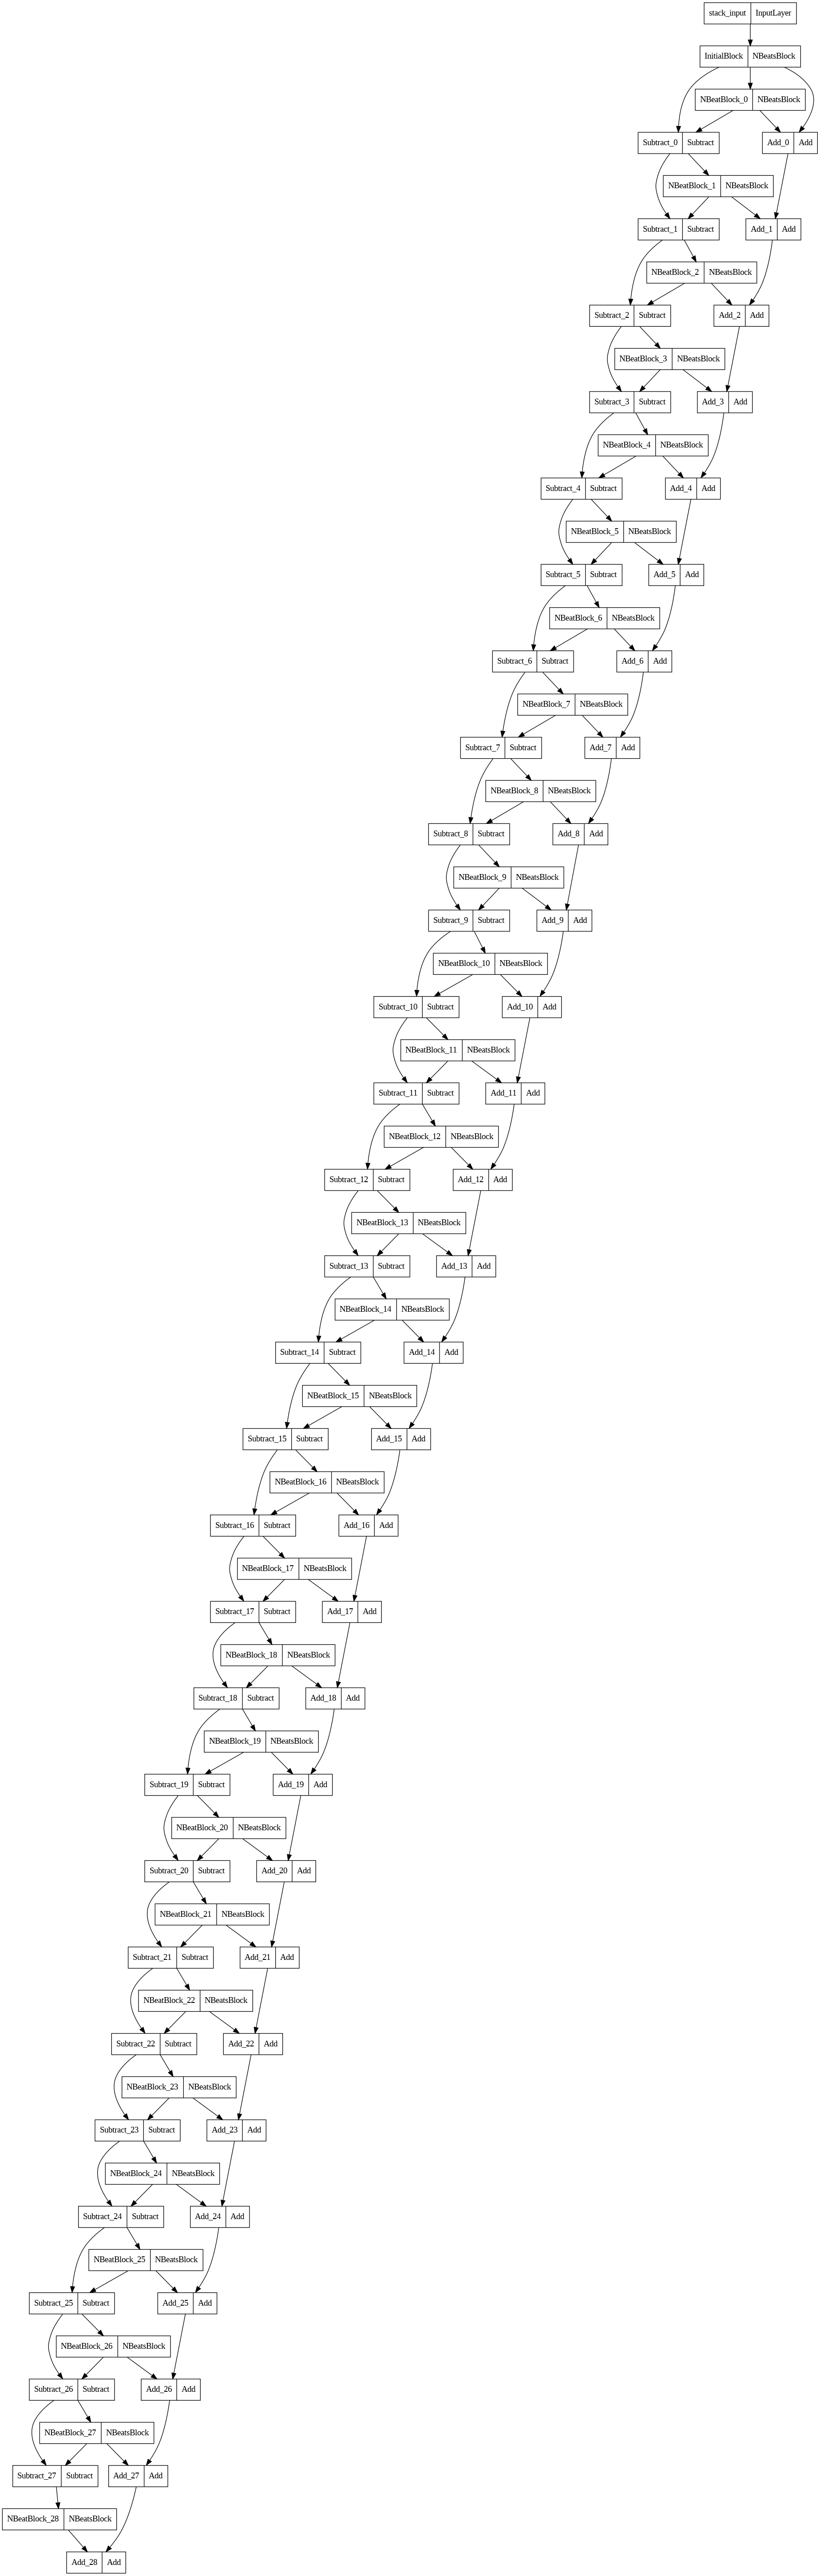

In [142]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8 : Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect(kalabalıgın bilgeligi).

It combines many different models to predict a common goal.

In [143]:
HORIZON , WINDOW_SIZE

(1, 7)

## Constructing and fitting and ensemble of models (using different loss functions)

Ensemble yaparken farklı modellere bakarken aynı zamanda bütün modellerin weightsleri de farklı farklı başlıyor en başta. Bu yüzden bu bize çok büyük bir avantaj sağlıyor.

In [144]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # It means how many different models that we are going to train.
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
       # Initialize dense layers with normal distribution for estimating prediction intervals later on. ("he_normal" is for normal distribution) (Kernel initialization aslında ilk başta weightslerimizi random geliyor o random gelen weightsleri neye göre ayarlıcaz onu belirliyor.)
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(
    num_iter = 5 ,
    num_epochs = 1000
)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 713: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 922: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0


In [ ]:
len(ensemble_models)

In [ ]:
# Create a function which uses  a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models , data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(
    ensemble_models = ensemble_models ,
    data = test_dataset
)
ensemble_preds

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds , axis = 0)
ensemble_mean[ : 10]

In [ ]:
ensemble_median = np.median(ensemble_preds , axis = 0)
ensemble_median[ : 10]

In [ ]:
# Evaluate ensemble model predictions with ensemble_mean
ensemble_results = evaluate_preds(
    y_true = y_test ,
    y_pred = ensemble_mean
)
ensemble_results

In [ ]:
# Evaluate ensemble model predictions with ensemble_median
ensemble_results = evaluate_preds(
    y_true = y_test ,
    y_pred = ensemble_median
)
ensemble_results

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median

### Plotting the prediction intervals (uncertainty estimates) of our ensemble.

So far , we have been making point predictions with our models.

e.g. horizon = 1 , our model predicts tomorrow's price of bitcoin will be 50,000 usd.

Wouldnt it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 usd on the dot , how about 48,000 to 52,000 usd?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initiliazed models ( we got this thanks to our ensemble model)
2. Measure the standart deviation of the predictions.
3. Multiply the standart deviation by 1.96 ( assuming the distribution is Gaussian/Normal , 95% of observations fall within 1.96 standart deviations of the mean)( We used in our model kernel_initiliazer = he_normal and with respect to this parameter , we distributed with normal distribution.)
4. To get the prediction interval upper and lower bounds , add and subtract the value obtained in step 3 , to the mean/median of the predictions made in step 1. (https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2F97.5th_percentile_point&psig=AOvVaw1CzMxTzBqvygec_OO1fW-Z&ust=1693922112451000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCNDH4OGNkYEDFQAAAAAdAAAAABAD)

In [ ]:
tf.math.reduce_std(ensemble_preds , axis = 0)

Normal distributiona sahip datalarda mean direkt normal distribution curve ünün ortası oluyor. Normal distribution da datanın %95 ini coverlamak istiyorsan datanın mean değerine , datandan elde ettiğin standart deviation değerinin 1.96 ile çarpılmış halini ekleyip çıkartman lazım. Sonrasında bu iki değeri birleştirdiğinde datanın %95 ini coverlamış oluyorsun.

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # Step 1 : get predictions from a number of randomly initialized models.
     # Step 2 : Measure the standart deviations of the predictions.
     std = tf.math.reduce_std(preds , axis = 0)

     # Step 3 : Multiply the standart deviation by 1.96
     interval = 1.96 * std

     # Step 4 : Get the prediction interval upper and lower bounds.
     preds_mean = tf.reduce_mean(preds , axis = 0)
     lower , upper = preds_mean - interval , preds_mean + interval

     return lower , upper




In [ ]:
# Get the lower and upper bounds
lower_bound , upper_bound = get_upper_lower(ensemble_preds)
lower_bound , upper_bound

In [ ]:
X_test.index[ 500 :  ]

In [ ]:
# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize = (10 , 7))
plt.plot( X_test.index[ offset :  ]  , y_test[ offset : ] , "g-" , label = "Test Data")
plt.plot( X_test.index[ offset :  ] , ensemble_median[ offset : ] , "k-" , label = "Ensemble Median" )
plt.xlabel("Date")
plt.ylabel("Prices")
plt.fill_between( X_test.index[ offset : ] ,
                 (lower_bound)[ offset : ] ,
                 (upper_bound)[ offset : ] , label = "Prediction Intervals"
                  )  # For plotting upper and lower bounds
plt.legend(loc = "upper left" , fontsize = 14);


So far all of our predictions have been lagging behind the test data.

As is they are replicating what the naive model does and just predict the previous timestep as the next timestep.

Note : These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside : Two types of uncertainity : (coconut and subway)

Uncertainity estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? ( with perfect data , what is possible for a model to learn?)
2. What doesnt my model know? ( what can a model never predict? Or would it helpful if a model could tell you that when it is making a prediction, it doesnt actually know if it is right or not?) ( Food vision projemizde bir köpek fotoğrafı predict etmeye calıstıgımızda modelimizin bize ben daha önce böyle bir image train etmedim ve sonucu bilmiyorum demesi.)

There are two major types of uncertainity in machine learning you should know about:
* Aleatoric uncertainity - This type of uncertainity cant be reduced and it is often referred as data uncertainity or subway uncertainity.
* Epistemic uncertainity - This type of uncertainity can be reduced , it is also referred as "model" or "coconut" uncertainity.

# Model 9 : Train a model on the full historical data to make predictions into the future.

So far all of our models have predicted on the test dataset , however, this is only a pseudofuture.

Lets now build a model which is capable of predicting into the future.

In [ ]:
bitcoin_prices_windowed.tail()  # Bütün datamızı train dataset olarak kullanacağız çünkü artık gerçekten future predict yapacağız.

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price" , "block_reward"] , axis = 1 ).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all) , len(y_all)

In [ ]:
# Prefetching for faster fitting
dataset_all = tf.data.Dataset.from_tensor_slices((X_all , y_all))
dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)
dataset_all

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
from keras.backend import configure_and_create_distributed_session
# Create our model for predicting future
tf.random.set_seed(42)
model_9 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu" ) ,
        layers.Dense(128 , activation = "relu" ) ,
        layers.Dense(HORIZON )

    ] , name = "model_9_all"
)
# Compile a model
model_9.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                )

# Fit the model
model_9.fit(
    dataset_all ,
    epochs = 100

)

Biz her yeni predict yapacağımız zaman modelimizi retrain etmemiz gerekiyor. Çünkü her bir future predictimizde datamıza yeni bir datapoint ekleniyor bu da bizim predict ettigimiz deger oluyor. Yaptıgımız her predictionu previous inputumuza append edicez. Sonrasında append edilmiş inputu train edip yeni predictionlarımızı yapıcaz.

## Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:
1. Takes as input:
  * A list of values (bitcoin historical data)
  * A trained model ( such as model_9)
  * A window into the future to predict (our INTO_FUTURE variable)
  * The window size a model was trained on (WINDOW_SIZE). The model can only predict on the same kind of data it was trained on (should be in the same shape).
2. Creates an empty list for future forecasts (this will be returned at the end of the list , when it is full of predictions.) and extracts the last WINDOW_SIZE values from the input values.
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction. ( Prediction yaptıktan sonra yukarda bahsettigimiz inputumuzu update etme kısmı burası. Son prediction ımız bizim bir sonraki step için windowumuzun içine girecek ve bütün windowlar aynı size da olması gerek. Bu yüzden bizim prediction ımız windowun içine girdiğinde bir önceki windowun ilk elementini silmemiz gerekiyor aynı size ı elde etmek için.)  

In [ ]:
y_all[ - WINDOW_SIZE : ]

In [ ]:
# Create a function to make predictions into the future
def make_future_forecasts(values , model , into_future , window_size = WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # Create an empty list for future forecast/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE : ]

  # Make into_future number of predictions , altering the data which gets predicted on each time.
  for _ in range(into_future):
    # Predict on the last window then append it again again and again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window , axis = 0))
    print(f"Predicted on : \n {last_window} -> Prediction : {tf.squeeze(future_pred).numpy()} \n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE window)
    last_window = np.append(last_window , future_pred)[-WINDOW_SIZE : ]
  return future_forecast

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(
    values = y_all ,
    model = model_9 ,
    into_future = INTO_FUTURE ,

)

In [ ]:
def get_future_dates(start_date , into_future , offset = 1):  # offset değeri, başlangıç tarihine eklenir. Bu, başlangıç tarihini kaydırmanıza olanak tanır. Örneğin, varsayılan offset değeri 1 ise ve başlangıç tarihi 2023-09-04 ise, başlangıç tarihi 2023-09-05 olur.
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset , "D")  # D refers to day format
  end_date = start_date + np.timedelta64(into_future , "D")
  return np.arange(start_date , end_date , dtype = "datetime64[D]")

In [ ]:
# Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

In [ ]:
# Offset burda işe yarıyor. Bizim günlerimiz last_timestepten sonraki günden itibaren başlayacak offset sayesinde.
# Get next two weeks time steps
next_time_steps = get_future_dates(start_date = last_timestep , into_future = INTO_FUTURE)
next_time_steps

In [ ]:
# Insert last timestep/final price into next timesteps and future forecasts so the plot doesnt look janky
next_time_steps = np.insert( next_time_steps , 0 , last_timestep )
future_forecast = np.insert( future_forecast , 0 , btc_price[-1] )


In [ ]:
# Plot future prices of bitcoins
plt.figure(figsize = ( 10 , 7 ))
plot_time_series( bitcoin_prices.index , btc_price , start = 2500 , format = "-" , label = "Actual btc prices"  )
plot_time_series(next_time_steps ,future_forecast , format = "-"  , label = "Future forecasts" )

# Model_10 : Why forecasting is BS? (the turkey problem)(bir inek 1000 gününü çok iyi geçirebilir fakat 1001. gün kendini bizim soframızda bulabilir. Yani sadece 1 datapoint bütün datamızı değiştirebilir. Turkey problem bunu anlatıyor.)

In [ ]:
# Lets introduce a turkey problem to out btc data ( price of btc falls 100x in one day )
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
# Manufacture an extra price on the end (to showcase of turkey problem)
btc_price_turkey[-10 : ]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey

In [ ]:
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = btc_timesteps_turkey , values = btc_price_turkey , start = 2500 , format = "-" , label = "btc price & turkey" )

Sadece son datapointi değiştirdik.

In [ ]:
# Create train and test set for turkey problem data
full_windows , full_labels = make_windows( np.array(btc_price_turkey)  , window_size = WINDOW_SIZE , horizon = HORIZON)
X_train , X_test , y_train , y_test = make_train_test_splits(full_windows , full_labels)

In [ ]:
# Create a model same as model_1
model_10 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON )

    ] name = "model_10_dense"
)
# Compile a model
model_10.compile(loss = tf.keras.losses.mae ,
                 optimizer = tf.keras.optimizers.Adam()
                 )

# Fit the model
model_10.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = ( X_test , y_test ) ,
    batch_size = 128 ,
    callbacks = [ create_model_checkpoint(model_name = model_10.name) ]
)

In [ ]:
# Save the best perform of model_10
model_10 = tf.keras.models.load_model()

In [ ]:
# Make predictions with our model
model_10_preds = model_10.predict(X_test)
model_10_preds

In [ ]:
# Evaluate it
model_10_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_10_preds)
)

In [ ]:
model_1_results

In [ ]:
plt.figure(figsize = (10 , 7 ))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[ -len(X_test) :  ] ,
                 values = btc_price_turkey[ -len(y_test) :  ] ,
                 start = offset ,
                 format = "-" ,
                 label = "Turkey Test Data"
                 )
plot_time_series(
    timesteps = btc_timesteps_turkey[ -len(X_test) :  ] ,
    values = tf.squeeze(model_10_preds) ,
    start = offset ,
    label = "Preds"
)

In [ ]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": model_10_results}).T
model_results.head(10)

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");